In [1]:
!hostname

amueller-tabpfn-4gpu


In [2]:
import sklearn
sklearn.__version__

'1.2.1'

In [63]:
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [4]:
from sklearn.datasets import fetch_openml
#data = fetch_openml("LED-display-domain-7digit")
#data.frame

In [5]:
#data = fetch_openml("Touch2")
#data.frame


In [97]:
# DiabeticMellitus
data = fetch_openml("regime_alimentaire")
data.frame

/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Sexe,Origine_Ethnique,Age,Poids,Taille,pain_biscottes_cereales,riz_pates_semoule_pommes_de_terre,legumes_secs,legumes,fruits,produits_laitiers,viande_ou_oeufs,poisson,plats_prets_a_consommer,produits_sucres,biscuits_aperitif,complements_alimentaires,boissons_sucrees,boissons_alcoolisees,Surpoids
0,Femme,Caucasien,56.0,76.0,168.0,Une fois par jour,Une fois par jour,Plusieurs fois par semaine,Plusieurs fois par jour,Plusieurs fois par jour,Plusieurs fois par jour,Une fois par jour,Plusieurs fois par semaine,Jamais,Jamais,Occasionnellement,Plusieurs fois par semaine,Jamais,Plusieurs fois par semaine,oui
1,Femme,NaN,61.0,57.0,164.0,Plusieurs fois par jour,Occasionnellement,Occasionnellement,Une fois par jour,Plusieurs fois par semaine,Occasionnellement,Plusieurs fois par semaine,Occasionnellement,Occasionnellement,Occasionnellement,Occasionnellement,Plusieurs fois par jour,Occasionnellement,Occasionnellement,non
2,Femme,NaN,8.0,31.0,145.0,Plusieurs fois par jour,Une fois par jour,Occasionnellement,Plusieurs fois par semaine,Une fois par jour,Une fois par jour,Plusieurs fois par semaine,Plusieurs fois par semaine,Jamais,Plusieurs fois par semaine,Occasionnellement,Jamais,Occasionnellement,Jamais,non
3,Homme,Caucasien,22.0,67.0,178.0,Plusieurs fois par jour,Une fois par jour,Plusieurs fois par semaine,Une fois par jour,Une fois par jour,Plusieurs fois par jour,Une fois par jour,Plusieurs fois par semaine,Occasionnellement,Plusieurs fois par semaine,Jamais,Jamais,Plusieurs fois par semaine,Plusieurs fois par semaine,non
4,Femme,NaN,23.0,50.0,162.0,Plusieurs fois par jour,Plusieurs fois par jour,Plusieurs fois par semaine,Plusieurs fois par jour,Une fois par jour,Plusieurs fois par semaine,Une fois par jour,Plusieurs fois par semaine,Occasionnellement,Une fois par jour,Plusieurs fois par semaine,Jamais,Jamais,Occasionnellement,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Femme,Caucasien,16.0,63.0,168.0,Plusieurs fois par jour,Une fois par jour,Occasionnellement,Une fois par jour,Plusieurs fois par jour,Une fois par jour,Une fois par jour,Occasionnellement,Occasionnellement,Une fois par jour,Occasionnellement,Jamais,Jamais,Jamais,non
198,Homme,Caucasien,10.0,32.0,151.0,Une fois par jour,Plusieurs fois par semaine,Plusieurs fois par semaine,Plusieurs fois par semaine,Une fois par jour,Plusieurs fois par jour,Occasionnellement,Occasionnellement,Plusieurs fois par semaine,Une fois par jour,Une fois par jour,Jamais,Occasionnellement,Jamais,non
199,Homme,Caucasien,19.0,65.0,174.0,Plusieurs fois par semaine,Plusieurs fois par semaine,Occasionnellement,Occasionnellement,Plusieurs fois par semaine,Plusieurs fois par jour,Une fois par jour,Plusieurs fois par semaine,Une fois par jour,Occasionnellement,Plusieurs fois par semaine,Jamais,Occasionnellement,Plusieurs fois par semaine,non
200,Homme,Caucasien,16.0,105.0,170.0,Une fois par jour,Plusieurs fois par semaine,Plusieurs fois par semaine,Plusieurs fois par semaine,Plusieurs fois par jour,Plusieurs fois par jour,Plusieurs fois par semaine,Occasionnellement,Occasionnellement,Occasionnellement,Occasionnellement,Jamais,Plusieurs fois par semaine,Jamais,oui


In [7]:
data.frame.TYPE.value_counts()

1    182
0     99
Name: TYPE, dtype: int64

In [8]:
from sklearn.impute import SimpleImputer


X_train, X_test, y_train, y_test = train_test_split(np.array(data.data), data.target, stratify=data.target)
si = SimpleImputer(add_indicator=True).fit(X_train)
X_test = si.transform(X_test)
X_train = si.transform(X_train)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [10]:
from tabpfn.scripts.distill_mlp import TorchMLP, DistilledTabPFNMLP, DistilledTabPFNMLPUpsampler
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from tabpfn.transformer_make_model import ForwardLinearModel, ForwardMLPModel, load_model_maker

In [64]:
TorchMLP(n_epochs=100).fit(X_train, y_train).score(X_test, y_test)

0.9473684210526315

In [65]:
si = SimpleImputer().fit(X_train)

old_mlp = ForwardMLPModel(path='models_diff/prior_diff_real_checkpoint_predict_mlp_nlayer12_multiclass_04_13_2023_16_41_16_n_0_epoch_59.cpkt').fit(X_train, y_train)
old_mlp.score(X_test, y_test)

0.9473684210526315

In [66]:
old_mlp = ForwardMLPModel(path="models_diff/prior_diff_real_checkpoint_output_attention_nlayer6_mlp_emsize_512_multiclass_04_17_2023_23_11_02_n_0_epoch_92.cpkt").fit(X_train, y_train)
old_mlp.score(X_test, y_test)

0.9473684210526315

In [67]:
old_mlp = ForwardMLPModel(path="models_diff/prior_diff_real_checkpoint_predict_mlp_special_token_multiclass_04_19_2023_17_34_48_n_0_epoch_12.cpkt").fit(X_train, y_train)
old_mlp.score(X_test, y_test)

0.7631578947368421

In [15]:
old_mlp.score(X_train, y_train)

0.7333333333333333

In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
TabPFNClassifier().fit(X_train, y_train).score(X_test, y_test)

0.9295774647887324

In [18]:
roc_auc_score(y_test, TabPFNClassifier().fit(X_train, y_train).predict_proba(X_test)[:, 1])

0.9826086956521739

In [19]:
path = "models_diff/prior_diff_real_checkpoint_predict_mlp_special_token_multiclass_04_19_2023_17_34_48_n_0_epoch_12.cpkt"

mlp = ForwardMLPModel(path=path).fit(X_train, y_train)
mlp.score(X_test, y_test)

0.676056338028169

In [68]:
path_new_big = "models_diff/prior_diff_real_checkpoint_predict_mlp_attention_nlayer12_lr0001_multiclass_04_18_2023_21_31_58_n_0_epoch_40.cpkt"

In [69]:
mlp = ForwardMLPModel(path=path_new_big).fit(X_train, y_train)
mlp.score(X_test, y_test)

0.9473684210526315

In [73]:
from sklearn.model_selection import cross_validate
cross_validate(ForwardMLPModel(path=path_new_big), iris.data, iris.target, scoring="roc_auc_ovo")

{'fit_time': array([0.21221232, 0.29226208, 0.19259548, 0.13555717, 0.11931801]),
 'score_time': array([0.00642538, 0.01723456, 0.0036211 , 0.00361896, 0.00360394]),
 'test_score': array([0.99666667, 1.        , 1.        , 0.99333333, 1.        ])}

In [81]:
cross_validate(make_pipeline(StandardScaler(), SimpleImputer(), ForwardMLPModel(path=path_new_big)), iris.data, iris.target, scoring="roc_auc_ovo")

{'fit_time': array([0.3113935 , 0.13750815, 0.17230129, 0.119771  , 0.11514568]),
 'score_time': array([0.00371838, 0.00371432, 0.00372481, 0.00370884, 0.00370026]),
 'test_score': array([0.99666667, 1.        , 1.        , 0.99333333, 1.        ])}

In [78]:
cross_validate(bla, iris.data, iris.target, scoring="roc_auc_ovo")

{'fit_time': array([0.07281113, 0.06248689, 0.07125092, 0.05941343, 0.06685114]),
 'score_time': array([0.0043304 , 0.0042789 , 0.00428796, 0.00423336, 0.00423694]),
 'test_score': array([0.56666667, 0.58333333, 0.59666667, 0.59166667, 0.71833333])}

In [82]:
ForwardMLPModel(path=path_new_big)

ForwardMLPModel(path='models_diff/prior_diff_real_checkpoint_predict_mlp_attention_nlayer12_lr0001_multiclass_04_18_2023_21_31_58_n_0_epoch_40.cpkt')

In [80]:
bla

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler()),
                                                             ('simpleimputer',
                                                              SimpleImputer())]),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [])])),
                ('forwardmlpmodel',
                 ForwardMLPModel(path='models_diff/prior_diff_real_checkpoint_predict_mlp_special_token_multiclass_04_19_2023_17_34_48_n_0_epoch_12.cpkt'))])

In [74]:
roc_auc_score(y_test, make_pipeline(StandardScaler(),ForwardMLPModel(path=path_new_big)).fit(X_train, y_train).predict_proba(X_test), multi_class="ovo")

0.9970238095238096

In [76]:
bla = make_forward_mlp_model_big_bugfix_caching(categorical_features=[])

In [79]:
roc_auc_score(y_test,bla.fit(X_train, y_train).predict_proba(X_test), multi_class="ovo")

0.8843005952380952

In [23]:
model_new_big = load_model_maker(path_new_big)

In [24]:
model_new_big

MotherNet(
  (transformer_encoder): TransformerEncoderDiffInit(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=1024, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Linear(in_features=1024, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.0, inplace=False)
        (dropout2): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (encoder): Linear(in_features=100, out_features=512, bias=True)
  (y_encoder): OneHotAndLinear(in_features=10, out_features=512, bias=True)
  (decoder): MLPModelDecoder(
    (output_layer): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinea

In [25]:
model_with_special_token = load_model_maker("models_diff/prior_diff_real_checkpoint_predict_mlp_special_token_multiclass_04_19_2023_17_34_48_n_0_epoch_12.cpkt")
model_with_special_token

MotherNet(
  (transformer_encoder): TransformerEncoderDiffInit(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=1024, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Linear(in_features=1024, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.0, inplace=False)
        (dropout2): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (encoder): Linear(in_features=100, out_features=512, bias=True)
  (y_encoder): OneHotAndLinear(in_features=10, out_features=512, bias=True)
  (decoder): MLPModelDecoder(
    (output_layer): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(

In [26]:
model_no_special_token = load_model_maker("models_diff/prior_diff_real_checkpoint_output_attention_nlayer6_mlp_emsize_512_multiclass_04_17_2023_23_11_02_n_0_epoch_92.cpkt")

In [27]:
model_no_output_attention = load_model_maker('models_diff/prior_diff_real_checkpoint_predict_mlp_nlayer12_multiclass_04_13_2023_16_41_16_n_0_epoch_59.cpkt')

In [28]:
model_no_output_attention

MotherNet(
  (transformer_encoder): TransformerEncoderDiffInit(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=1024, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Linear(in_features=1024, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.0, inplace=False)
        (dropout2): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (encoder): Linear(in_features=100, out_features=512, bias=True)
  (y_encoder): OneHotAndLinear(in_features=10, out_features=512, bias=True)
  (decoder): MLPModelDecoder(
    (mlp): Sequential(
      (0): Linear(in_features=512, out_features=1024, bias=True)


In [29]:
model_no_special_token

MotherNet(
  (transformer_encoder): TransformerEncoderDiffInit(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=1024, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Linear(in_features=1024, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.0, inplace=False)
        (dropout2): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (encoder): Linear(in_features=100, out_features=512, bias=True)
  (y_encoder): OneHotAndLinear(in_features=10, out_features=512, bias=True)
  (decoder): MLPModelDecoder(
    (output_layer): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(

In [ ]:
model

In [38]:
path = "models_diff/prior_diff_real_checkpoint_output_attention_nlayer6_mlp_emsize_512_multiclass_04_17_2023_23_11_02_n_0_epoch_92.cpkt"
mlp_new = ForwardMLPModel(path=path).fit(X_train, y_train)
mlp_new.score(X_test, y_test)

0.5223880597014925

In [70]:
fl =ForwardLinearModel().fit(X_train, y_train)
fl.score(X_test, y_test)

0.552

In [81]:
fl.score(X_train, y_train)

0.6053333333333333

In [71]:
fl.__dict__.keys()

dict_keys(['path', 'device', 'X_train_', 'weights_', 'biases_', 'classes_'])

In [72]:
fl.biases_

array([-0.8431376 , -0.6694318 , -0.79845047, -1.1328869 , -0.2736702 ,
       -0.37032896, -0.36530772, -0.27058393, -0.16733406, -0.91697204],
      dtype=float32)

In [73]:
fl.weights_.shape

(7, 10)

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.696

In [75]:
lr.intercept_

array([-2.09983858, -2.96773128,  3.76362612,  0.86443588, -0.41582479,
        1.20212479,  0.81131683, -0.59673638,  2.59729748, -3.15867006])

In [76]:
lr.coef_.shape

(10, 7)

<Axes: >

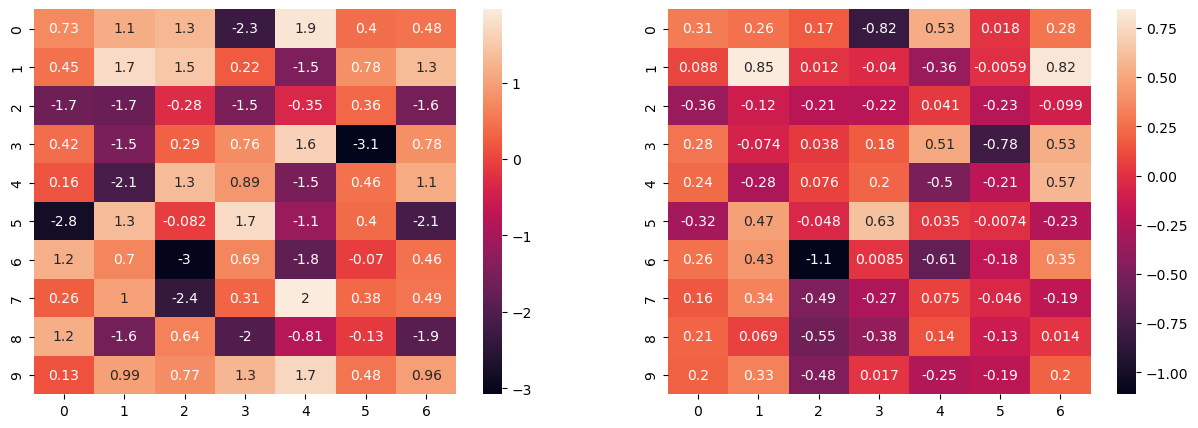

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(lr.coef_, annot=True, ax=axes[0])
sns.heatmap(fl.weights_.T, annot=True, ax=axes[1])


<Axes: >

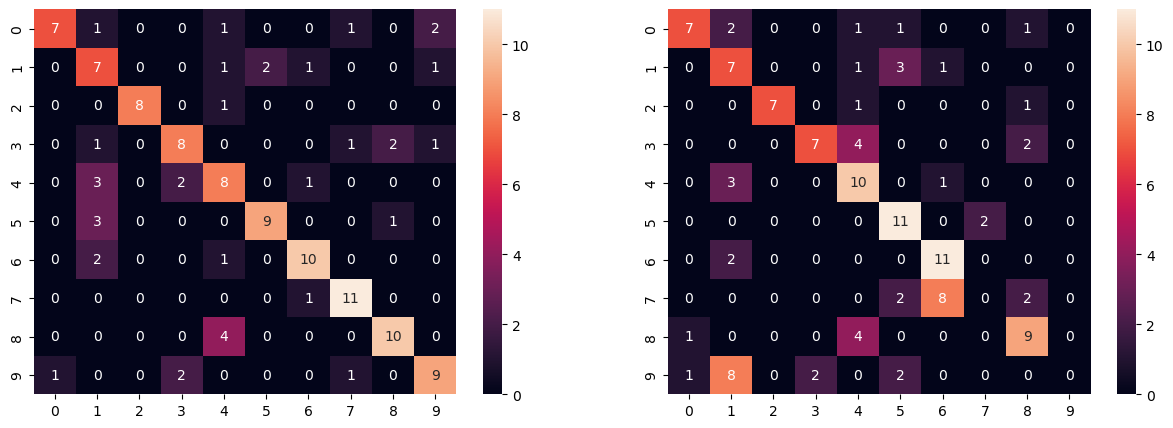

In [83]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot=True, ax=axes[0])
sns.heatmap(confusion_matrix(y_test, fl.predict(X_test)), annot=True, ax=axes[1])

<Axes: >

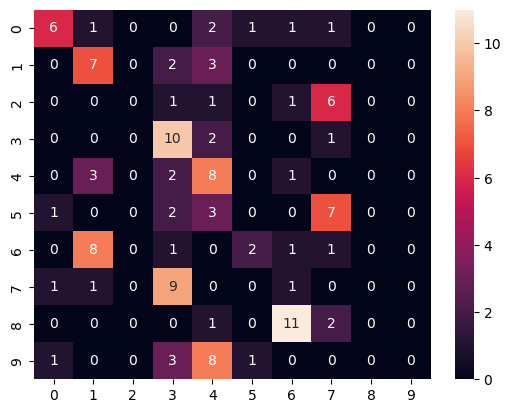

In [85]:
sns.heatmap(confusion_matrix(y_test, old_mlp.predict(X_test)), annot=True)

In [30]:
from sklearn.base import ClassifierMixin, BaseEstimator
from tabpfn.transformer_make_model import load_model_maker, extract_linear_model, predict_with_linear_model
from sklearn.preprocessing import LabelEncoder

class ForwardLinearModel2(ClassifierMixin, BaseEstimator):
    def __init__(self, path=None, device="cpu", permute_labels=False):
        self.path = path or "models_diff/prior_diff_real_checkpoint_predict_linear_coefficients_nlayer_6_multiclass_04_11_2023_01_26_19_n_0_epoch_94.cpkt"
        self.device = device
        self.permute_labels = permute_labels
        
    def fit(self, X, y):
        self.X_train_ = X
        le = LabelEncoder()
        y = le.fit_transform(y)
        model = load_model_maker(self.path).to(self.device)

        if self.permute_labels:
            n_classes = len(le.classes_)
            weights = []
            biases = []
            for i in range(n_classes):
                indices = np.mod(np.arange(n_classes) + i, n_classes)
                w, b = extract_linear_model(model, X, np.mod(y + i, n_classes), device=self.device)
                weights.append(w[:, indices])
                biases.append(b[indices])
            self.weights_ = np.mean(weights, axis=0)
            self.biases_ = np.mean(biases, axis=0)
        else:

            weights, biases = extract_linear_model(model, X, y, device=self.device)
            self.weights_ = weights
            self.biases_ = biases
        self.classes_ = le.classes_
        return self
        
    def predict_proba(self, X):
        return predict_with_linear_model(self.X_train_, X, self.weights_, self.biases_)
    
    def predict(self, X):
        return self.classes_[self.predict_proba(X).argmax(axis=1)]

In [31]:
class ForwardLinearModel3(ClassifierMixin, BaseEstimator):
    def __init__(self, path=None, device="cpu", label_offset=0):
        self.path = path or "models_diff/prior_diff_real_checkpoint_predict_linear_coefficients_nlayer_6_multiclass_04_11_2023_01_26_19_n_0_epoch_94.cpkt"
        self.device = device
        self.label_offset = label_offset
        
    def fit(self, X, y):
        self.X_train_ = X
        le = LabelEncoder()
        y = le.fit_transform(y)
        model = load_model_maker(self.path).to(self.device)
        n_classes = len(le.classes_)

        indices = np.mod(np.arange(n_classes) + self.label_offset, n_classes)
        w, b = extract_linear_model(model, X, np.mod(y + self.label_offset, n_classes), device=self.device)

        self.weights_ = w[:, indices]
        self.biases_ = b[indices]

        self.classes_ = le.classes_
        return self
        
    def predict_proba(self, X):
        return predict_with_linear_model(self.X_train_, X, self.weights_, self.biases_)
    
    def predict(self, X):
        return self.classes_[self.predict_proba(X).argmax(axis=1)]

In [32]:
import torch
from tabpfn import encoders
from tabpfn.transformer_make_model import MotherNet, extract_mlp_model, predict_with_mlp_model
from sklearn.base import BaseEstimator, ClassifierMixin

class ForwardMLPModel3(ClassifierMixin, BaseEstimator):
    def __init__(self, path=None, device="cpu", label_offset=0):
        self.path = path or "models_diff/prior_diff_real_checkpoint_predict_mlp_nlayer12_multiclass_04_13_2023_16_41_16_n_0_epoch_37.cpkt"
        self.device = device
        self.label_offset = label_offset

        
    def fit(self, X, y):
        self.X_train_ = X
        le = LabelEncoder()
        y = le.fit_transform(y)
        model_state, _, config  = torch.load(self.path)
        encoder = encoders.Linear(config['num_features'], config['emsize'], replace_nan_by_zero=True)
        y_encoder = encoders.OneHotAndLinear(config['max_num_classes'], emsize=config['emsize'])
        loss = torch.nn.CrossEntropyLoss(reduction='none', weight=torch.ones(int(config['max_num_classes'])))
        model_maker = config.get('model_maker', "")
        output_attention = config.get('output_attention', "")
        if model_maker  == "mlp":
            model = MotherNet(ninp=config['emsize'], nlayers=config['nlayers'], n_out=config['max_num_classes'], nhead=config['nhead'],nhid=config['emsize'] * config['nhid_factor'], encoder=encoder, y_encoder=y_encoder, output_attention=output_attention)
        elif  model_maker:
            model = TransformerModelMaker(ninp=config['emsize'], nlayers=config['nlayers'], n_out=config['max_num_classes'], nhead=config['nhead'],nhid=config['emsize'] * config['nhid_factor'], encoder=encoder, y_encoder=y_encoder)

        model.criterion = loss
        module_prefix = 'module.'
        model_state = {k.replace(module_prefix, ''): v for k, v in model_state.items()}

        n_classes = len(le.classes_)

        model.load_state_dict(model_state)
        model.to(self.device)
        indices = np.mod(np.arange(n_classes) + self.label_offset, n_classes)

        b1, w1, b2, w2 = extract_mlp_model(model, X, np.mod(y + self.label_offset, n_classes), device=self.device)
        self.parameters_  = (b1, w1, b2[indices], w2[:, indices])
        self.classes_ = le.classes_
        return self
        
    def predict_proba(self, X):
        return predict_with_mlp_model(self.X_train_, X, *self.parameters_)
    
    def predict(self, X):
        return self.classes_[self.predict_proba(X).argmax(axis=1)]


In [41]:
class ForwardMLPModel4(ClassifierMixin, BaseEstimator):
    def __init__(self, path=None, device="cpu", label_offset=0):
        self.path = path or "models_diff/prior_diff_real_checkpoint_predict_mlp_nlayer12_multiclass_04_13_2023_16_41_16_n_0_epoch_37.cpkt"
        self.device = device
        self.label_offset = label_offset

        
    def fit(self, X, y):
        self.X_train_ = X
        le = LabelEncoder()
        y = le.fit_transform(y)
        n_classes = len(le.classes_)

        model = load_model_maker(self.path)
        model.to(self.device)
        indices = np.mod(np.arange(n_classes) + self.label_offset, n_classes)

        b1, w1, b2, w2 = extract_mlp_model(model, X, np.mod(y + self.label_offset, n_classes), device=self.device)
        self.parameters_  = (b1, w1, b2[indices], w2[:, indices])
        self.classes_ = le.classes_
        return self
        
    def predict_proba(self, X):
        return predict_with_mlp_model(self.X_train_, X, *self.parameters_)
    
    def predict(self, X):
        return self.classes_[self.predict_proba(X).argmax(axis=1)]


In [34]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([(str(i), ForwardLinearModel3(label_offset=i)) for i in range(len(np.unique(y_train)))])

In [47]:
vc_mlp = VotingClassifier([(str(i), ForwardMLPModel4(label_offset=i, path=path_new_big)) for i in range(len(np.unique(y_train)))])

In [48]:
vc_mlp.fit(X_train, y_train).score(X_test, y_test)

0.971830985915493

In [49]:
ForwardMLPModel4(label_offset=0, path=path_new_big).fit(X_train, y_train).score(X_test, y_test)

0.9577464788732394

In [136]:
path = "models_diff/prior_diff_real_checkpoint_output_attention_nlayer6_mlp_emsize_512_multiclass_04_17_2023_23_11_02_n_0_epoch_92.cpkt"

vc_mlp_new = VotingClassifier([(str(i), ForwardMLPModel3(label_offset=i, path=path)) for i in range(len(np.unique(y_train)))])
vc_mlp.fit(X_train, y_train).score(X_test, y_test)

0.672

In [116]:
vc.fit(X_train, y_train).score(X_test, y_test)

0.72

In [95]:
fl2 = ForwardLinearModel2()
fl2.fit(X_train, y_train).score(X_test, y_test)

0.552

In [101]:
fl2 = ForwardLinearModel2(permute_labels=True)
fl2.fit(X_train, y_train).score(X_test, y_test)

0.672

<Axes: >

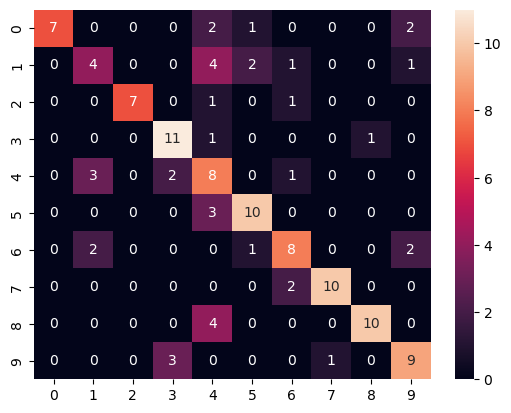

Bad pipe message: %s [b'1>\x08\x06\xf4T\xfb\x91\x91\xbfw\nt\xdc\x97\xbe;\xbb \xce\xadi\x1d\xa28\x8c"\x0571M\xcd\x92L%\x839\xaa<)\x81[\xee\x1d\x97\xe5\x84#\xaeG\xaa\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03', b'\x06\x03\x08\x07', b'\x08\t\x08\n\x08\x0b\x08']
Bad pipe message: %s [b'\x05\x08\x06']
Bad pipe message: %s [b'\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 E\xdb`\xa9\xbf1\x1d\xd4\xb8\xd6|\r\xfa\xaa\xc7{\xec\x83\xe2\n\x008']
Bad pipe message: %s [b'Lpt0\xd0\xda\xf5{\x02\x91&\x11\x9d\x0bu\x15$\x87\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00', b"\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x0

In [134]:
sns.heatmap(confusion_matrix(y_test, vc_mlp.predict(X_test)), annot=True)

<Axes: >

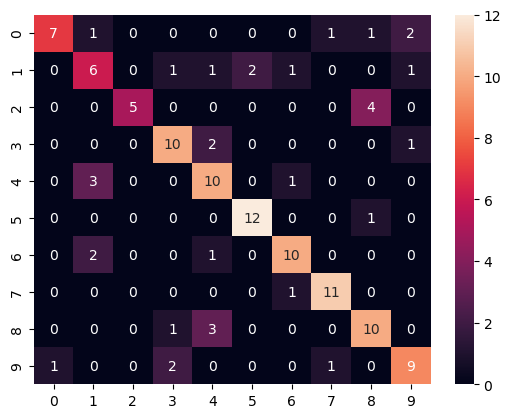

In [117]:
sns.heatmap(confusion_matrix(y_test, vc.predict(X_test)), annot=True)

<Axes: >

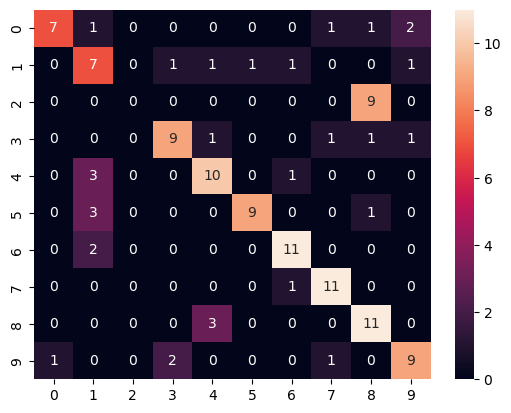

In [102]:
sns.heatmap(confusion_matrix(y_test, fl2.predict(X_test)), annot=True)

In [78]:
lr.score(X_test, y_test)

0.696

In [79]:
fl.score(X_test, y_test)

0.552

In [19]:
[x.shape for x in mlp.parameters_]

[(128,), (4, 128), (3,), (128, 3)]

In [20]:
[x.shape for x in old_mlp.parameters_]

[(512,), (4, 512), (3,), (512, 3)]

In [ ]:
import torch
torch.cuda.current_device()

In [ ]:
torch.cuda.device_count()

Bad pipe message: %s [b"\xbbp\xa3\xa2\xe6'Z\xe3l\x91g\xe3\xff\xadCV\xc5X \xc7\xb3;c\x06Sb\xb1\x8b\x93\xd6\xa8?2\xe4\xf8\x17\x19\xaa\xbeL\xa4\x9cgz\x90 \x1b'Q\x8c<\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00", b'\x1d\x00 \xb1\x92\x83\x9d#\x8f\x1aQ\n\xec\xd1iA\xdc\xd4\xb6\x12+\x16\xfe\xf2r2I\x89\xf7<\t\xec\x9f`8']
Bad pipe message: %s [b'\x85\xff\xfd\x15H~\x8cV\xb8\xaa\x11\x15\x95{']
Bad pipe message: %s [b'\x17\xa9\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a']
Bad pipe message: %s [b"\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0

In [55]:
from tabpfn.datasets import load_openml_list, open_cc_dids, open_cc_valid_dids, test_dids_classification

cc_valid_datasets_multiclass, cc_valid_datasets_multiclass_df = load_openml_list(open_cc_valid_dids, multiclass=True, shuffled=True, filter_for_nan=False, max_samples = 10000, num_feats=100, return_capped=True)

Number of datasets: 149


In [84]:
from tabpfn.scripts.evaluate_baselines_sklearn import make_logreg, make_knn, make_hgb, make_rf, make_tabpfn, make_mlp, make_distilled_tabpfn

In [27]:
models = {'mlp': make_mlp,
          'distilled_tabpfn': make_distilled_tabpfn,
         'distilled_tabpfn_ht': make_distilled_tabpfn_ht,

          'logreg': make_logreg,
            'knn': make_knn,
            'rf': make_rf,
            'tabpfn': make_tabpfn}

In [28]:
from tqdm import tqdm

In [22]:

from collections import defaultdict
all_scores = defaultdict(dict)
for ds_name, X, y, categorical_features, _, _ in tqdm(cc_valid_datasets_multiclass):
    print(ds_name)
    for model_name, model_creator in models.items():
        clf = model_creator(categorical_features)
        if X.shape[1] > 100:
            X = X[:, :100]
        try:
            scores = cross_validate(clf, X, y, scoring="roc_auc_ovo", n_jobs=-1)
            score = scores['test_score'].mean()
        except Exception as e:
            print(str(e))
            score = np.NaN
        all_scores[ds_name][model_name] = score

  0%|                                                                                                                                                                                                                                                 | 0/149 [00:00<?, ?it/s]

breast-cancer
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  1%|█▌                                                                                                                                                                                                                                     | 1/149 [00:33<1:22:42, 33.53s/it]

colic
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  1%|███                                                                                                                                                                                                                                    | 2/149 [01:08<1:24:20, 34.43s/it]

dermatology

All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/distill_mlp.py", line 94, in fit
    tbfn = TabPFNClassifier(N_ensemble_configurations=32, temperature=self.temperature, device=self.device).fit(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  2%|████▋                                                                                                                                                                                                                                  | 3/149 [01:25<1:03:51, 26.24s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/transformer_prediction_interface.py", line 197, in fit
    raise ValueError("The number of features for this classifier is restricted to ", self.max_num_features)
ValueError: ('The number of features for this classifier is restricted to ', 100)

sonar
Multiple models in mem

  3%|██████▎                                                                                                                                                                                                                                  | 4/149 [01:45<57:24, 23.76s/it]

glass
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  3%|███████▊                                                                                                                                                                                                                                 | 5/149 [02:03<52:33, 21.90s/it]

haberman
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  4%|█████████▍                                                                                                                                                                                                                               | 6/149 [02:26<53:06, 22.29s/it]

tae
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  5%|██████████▉                                                                                                                                                                                                                              | 7/149 [02:45<49:58, 21.12s/it]

heart-c
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  5%|████████████▌                                                                                                                                                                                                                            | 8/149 [03:11<53:33, 22.79s/it]

heart-h
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  6%|██████████████                                                                                                                                                                                                                           | 9/149 [03:39<56:39, 24.28s/it]

heart-statlog
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  7%|███████████████▌                                                                                                                                                                                                                        | 10/149 [04:04<56:35, 24.43s/it]

hepatitis
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  7%|█████████████████▏                                                                                                                                                                                                                      | 11/149 [04:23<52:38, 22.89s/it]

vote
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lea

  8%|██████████████████▋                                                                                                                                                                                                                     | 12/149 [04:53<57:27, 25.17s/it]

ionosphere
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  9%|████████████████████▏                                                                                                                                                                                                                   | 13/149 [05:17<56:12, 24.79s/it]

iris
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


  9%|█████████████████████▊                                                                                                                                                                                                                  | 14/149 [05:34<50:34, 22.48s/it]

wine
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 10%|███████████████████████▎                                                                                                                                                                                                                | 15/149 [05:54<48:01, 21.51s/it]

hayes-roth
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This mig

 11%|████████████████████████▉                                                                                                                                                                                                               | 16/149 [06:12<45:31, 20.53s/it]

monks-problems-1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 11%|██████████████████████████▍                                                                                                                                                                                                             | 17/149 [06:49<56:19, 25.60s/it]

monks-problems-2
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. Th

 12%|███████████████████████████▊                                                                                                                                                                                                          | 18/149 [07:30<1:05:47, 30.13s/it]

monks-problems-3
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 13%|█████████████████████████████▎                                                                                                                                                                                                        | 19/149 [08:07<1:09:26, 32.05s/it]

SPECT
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might le

 13%|██████████████████████████████▊                                                                                                                                                                                                       | 20/149 [08:32<1:04:26, 29.97s/it]

SPECTF
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might l

 14%|████████████████████████████████▍                                                                                                                                                                                                     | 21/149 [09:00<1:03:11, 29.62s/it]

grub-damage
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This mi

 15%|██████████████████████████████████▎                                                                                                                                                                                                     | 22/149 [09:19<55:46, 26.35s/it]

synthetic_control
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. T

 15%|███████████████████████████████████▌                                                                                                                                                                                                  | 23/149 [10:01<1:05:08, 31.02s/it]

prnn_crabs
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 16%|█████████████████████████████████████▎                                                                                                                                                                                                  | 24/149 [10:18<55:45, 26.77s/it]

analcatdata_lawsuit
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 17%|██████████████████████████████████████▉                                                                                                                                                                                                 | 25/149 [10:41<52:52, 25.58s/it]

irish
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 17%|████████████████████████████████████████▍                                                                                                                                                                                               | 26/149 [11:18<59:43, 29.13s/it]

analcatdata_broadwaymult
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 18%|██████████████████████████████████████████                                                                                                                                                                                              | 27/149 [11:43<56:46, 27.92s/it]

analcatdata_reviewer
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 19%|███████████████████████████████████████████▌                                                                                                                                                                                            | 28/149 [12:12<56:40, 28.10s/it]

backache
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 19%|█████████████████████████████████████████████▏                                                                                                                                                                                          | 29/149 [12:32<51:31, 25.77s/it]

prnn_synth
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This mig

 20%|██████████████████████████████████████████████▋                                                                                                                                                                                         | 30/149 [12:48<45:10, 22.78s/it]

schizo
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 21%|████████████████████████████████████████████████▎                                                                                                                                                                                       | 31/149 [13:16<48:08, 24.48s/it]

profb
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might le

 21%|█████████████████████████████████████████████████▊                                                                                                                                                                                      | 32/149 [13:58<57:29, 29.48s/it]

analcatdata_germangss
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 22%|███████████████████████████████████████████████████▍                                                                                                                                                                                    | 33/149 [14:27<56:52, 29.42s/it]

biomed
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 23%|████████████████████████████████████████████████████▉                                                                                                                                                                                   | 34/149 [14:50<52:45, 27.52s/it]

rmftsa_sleepdata
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. Th

 23%|██████████████████████████████████████████████████████                                                                                                                                                                                | 35/149 [15:38<1:04:04, 33.72s/it]

diggle_table_a2
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 24%|████████████████████████████████████████████████████████                                                                                                                                                                                | 36/149 [16:05<59:54, 31.81s/it]

rmftsa_ladata
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 25%|█████████████████████████████████████████████████████████                                                                                                                                                                             | 37/149 [16:44<1:03:14, 33.88s/it]

pwLinear
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 26%|███████████████████████████████████████████████████████████▏                                                                                                                                                                            | 38/149 [17:04<55:03, 29.76s/it]

Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
analcatdata_vineyard
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 26%|████████████████████████████████████████████████████████████▋                                                                                                                                                                           | 39/149 [17:38<56:32, 30.84s/it]

machine_cpu
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 27%|██████████████████████████████████████████████████████████████▎                                                                                                                                                                         | 40/149 [17:54<48:17, 26.58s/it]

pharynx
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 28%|███████████████████████████████████████████████████████████████▊                                                                                                                                                                        | 41/149 [18:18<46:12, 25.67s/it]

auto_price
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This mig

 28%|█████████████████████████████████████████████████████████████████▍                                                                                                                                                                      | 42/149 [18:38<42:43, 23.96s/it]

servo
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 29%|██████████████████████████████████████████████████████████████████▉                                                                                                                                                                     | 43/149 [18:55<38:53, 22.02s/it]

analcatdata_wildcat
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 30%|████████████████████████████████████████████████████████████████████▌                                                                                                                                                                   | 44/149 [19:16<37:37, 21.50s/it]

pm10
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lea

 30%|██████████████████████████████████████████████████████████████████████                                                                                                                                                                  | 45/149 [19:48<42:59, 24.80s/it]

wisconsin
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 31%|███████████████████████████████████████████████████████████████████████▌                                                                                                                                                                | 46/149 [20:10<41:09, 23.98s/it]

autoPrice
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 32%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                                                              | 47/149 [20:30<38:30, 22.66s/it]

meta
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lea

 32%|██████████████████████████████████████████████████████████████████████████▋                                                                                                                                                             | 48/149 [21:08<46:03, 27.36s/it]

analcatdata_apnea3
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                           | 49/149 [21:40<48:05, 28.86s/it]

analcatdata_apnea2
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. 

 34%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                          | 50/149 [22:13<49:34, 30.04s/it]

analcatdata_apnea1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 34%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                        | 51/149 [22:51<52:52, 32.37s/it]

disclosure_x_bias
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 35%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                       | 52/149 [23:20<50:48, 31.43s/it]

bodyfat
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 36%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                     | 53/149 [23:44<46:22, 28.98s/it]

cleveland
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 36%|████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                    | 54/149 [24:05<42:21, 26.75s/it]

triazines
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 37%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                  | 55/149 [24:29<40:21, 25.76s/it]

disclosure_x_tampered
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 38%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                | 56/149 [24:51<38:22, 24.75s/it]

cpu
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 38%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                               | 57/149 [25:10<35:18, 23.03s/it]

cholesterol
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This mi

 39%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                             | 58/149 [25:34<35:22, 23.32s/it]

chscase_funds
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This 

 40%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                            | 59/149 [25:48<30:36, 20.40s/it]

pbcseq

All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/distill_mlp.py", line 94, in fit
    tbfn = TabPFNClassifier(N_ensemble_configurations=32, temperature=self.temperature, device=self.device).fit(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 40%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                          | 60/149 [26:04<28:43, 19.37s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/transformer_prediction_interface.py", line 201, in fit
    raise ValueError("⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machin

 41%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                         | 61/149 [26:37<34:04, 23.24s/it]

rmftsa_ctoarrivals
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 42%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                       | 62/149 [27:00<33:38, 23.20s/it]

chscase_vine2
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 42%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                      | 63/149 [27:21<32:29, 22.66s/it]

chatfield_4
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 43%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                    | 64/149 [27:44<32:08, 22.68s/it]

boston_corrected
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 44%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                  | 65/149 [28:21<37:41, 26.92s/it]

sensory
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might 

 44%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                 | 66/149 [29:01<42:49, 30.96s/it]

disclosure_x_noise
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. 

 45%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                               | 67/149 [29:27<40:13, 29.43s/it]

autoMpg
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                              | 68/149 [30:01<41:23, 30.66s/it]

kdd_el_nino-small
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. T

 46%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                            | 69/149 [30:52<49:00, 36.76s/it]

Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
autoHorse
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This migh

 47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                           | 70/149 [31:13<42:13, 32.07s/it]

stock
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might le

 48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                         | 71/149 [32:14<53:01, 40.78s/it]

breastTumor
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 48%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                        | 72/149 [32:39<46:13, 36.02s/it]

analcatdata_gsssexsurvey
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 73/149 [32:58<39:08, 30.91s/it]

boston
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                    | 74/149 [33:33<40:14, 32.19s/it]

fishcatch
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                   | 75/149 [33:48<33:33, 27.22s/it]

vinnie
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                 | 76/149 [34:07<29:53, 24.57s/it]

mu284
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                | 77/149 [34:31<29:19, 24.44s/it]

no2
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                              | 78/149 [35:03<31:36, 26.72s/it]

chscase_geyser1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                             | 79/149 [35:19<27:15, 23.36s/it]

chscase_census6
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. Thi

 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 80/149 [35:46<28:08, 24.46s/it]

chscase_census5
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. Thi

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 81/149 [36:14<28:58, 25.57s/it]

chscase_census4
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. Thi

 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                        | 82/149 [36:43<29:44, 26.63s/it]

chscase_census3
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. Thi

 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                      | 83/149 [37:12<30:09, 27.42s/it]

chscase_census2
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 84/149 [37:41<30:19, 27.99s/it]

plasma_retinol
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 85/149 [38:11<30:21, 28.45s/it]

visualizing_galaxy
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 86/149 [38:30<26:47, 25.51s/it]

colleges_usnews
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()

All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/distill_mlp.py", line 94, in fit
    tbfn = Ta

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 87/149 [38:47<23:42, 22.94s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/transformer_prediction_interface.py", line 201, in fit
    raise ValueError("⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machin

 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                               | 88/149 [39:13<24:29, 24.08s/it]

socmob
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 89/149 [40:31<40:07, 40.13s/it]

chscase_whale
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 90/149 [40:50<33:18, 33.88s/it]

water-treatment

All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/distill_mlp.py", line 94, in fit
    tbfn = TabPFNClassifier(N_ensemble_configurations=32, temperature=self.temperature, device=self.device).fit(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 91/149 [41:07<27:48, 28.78s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/transformer_prediction_interface.py", line 197, in fit
    raise ValueError("The number of features for this classifier is restricted to ", self.max_num_features)
ValueError: ('The number of features for this classifier is restricted to ', 100)

lowbwt
Multiple models in me

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 92/149 [41:27<24:47, 26.10s/it]

arsenic-female-bladder
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


/anaconda/envs/fresh311/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                       | 93/149 [42:02<26:56, 28.87s/it]

analcatdata_halloffame

All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/distill_mlp.py", line 94, in fit
    tbfn = TabPFNClassifier(N_ensemble_configurations=32, temperature=self.temperature, device=self.device).fit(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 94/149 [42:15<21:56, 23.93s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/transformer_prediction_interface.py", line 201, in fit
    raise ValueError("⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machin

 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 95/149 [42:42<22:26, 24.93s/it]

analcatdata_draft
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 96/149 [43:10<22:57, 25.99s/it]

collins
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 97/149 [43:47<25:14, 29.12s/it]

prnn_fglass
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This mi

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 98/149 [44:09<22:59, 27.06s/it]

jEdit_4.2_4.3
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 99/149 [44:40<23:28, 28.18s/it]

mc2
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 100/149 [44:57<20:12, 24.74s/it]

mw1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 101/149 [45:29<21:36, 27.01s/it]

jEdit_4.0_4.2
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 102/149 [45:56<21:05, 26.93s/it]

PopularKids
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 103/149 [46:30<22:22, 29.18s/it]

teachingAssistant
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 104/149 [46:49<19:36, 26.15s/it]

lungcancer_GSE31210
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 105/149 [47:11<18:19, 24.98s/it]

MegaWatt1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 106/149 [47:35<17:36, 24.57s/it]

PizzaCutter1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 107/149 [48:19<21:11, 30.28s/it]

PizzaCutter3
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 108/149 [49:27<28:31, 41.73s/it]

CostaMadre1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 109/149 [49:48<23:40, 35.52s/it]

CastMetal1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This mig

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 110/149 [50:19<22:09, 34.08s/it]

KnuggetChase3
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 111/149 [50:40<19:11, 30.29s/it]

PieChart1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This migh

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 112/149 [51:28<21:51, 35.46s/it]

PieChart3
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 113/149 [52:39<27:40, 46.11s/it]

Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
parkinsons
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This mig

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 114/149 [53:01<22:43, 38.97s/it]

planning-relax
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 115/149 [53:25<19:36, 34.60s/it]

qualitative-bankruptcy
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 116/149 [53:48<17:04, 31.03s/it]

sa-heart
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 117/149 [54:23<17:11, 32.24s/it]

seeds
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 118/149 [54:41<14:25, 27.93s/it]

thoracic-surgery
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 119/149 [55:14<14:46, 29.56s/it]

user-knowledge
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 120/149 [55:43<14:06, 29.17s/it]

wholesale-customers
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 121/149 [56:13<13:45, 29.49s/it]

heart-long-beach
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. Th

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 122/149 [56:35<12:13, 27.17s/it]

robot-failures-lp5
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. 

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 123/149 [56:55<10:54, 25.16s/it]

vertebra-column
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. Thi

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 124/149 [57:20<10:27, 25.09s/it]

Smartphone-Based_Recognition_of_Human_Activities
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 125/149 [57:41<09:35, 23.99s/it]

breast-cancer-dropped-missing-attributes-values
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 126/149 [58:04<09:03, 23.63s/it]

LED-display-domain-7digit
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in m

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 127/149 [58:39<09:49, 26.81s/it]

GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1

All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/distill_mlp.py", line 94, in fit
    tbfn = TabPFNClassifier(N_ensemble_configurations=32, temperature=self.temperature, device=self.device).fit(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 128/149 [58:53<08:07, 23.23s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/transformer_prediction_interface.py", line 201, in fit
    raise ValueError("⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machin

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 129/149 [59:07<06:46, 20.34s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/transformer_prediction_interface.py", line 197, in fit
    raise ValueError("The number of features for this classifier is restricted to ", self.max_num_features)
ValueError: ('The number of features for this classifier is restricted to ', 100)

corral
Multiple models in me

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 130/149 [59:26<06:19, 19.96s/it]

mofn-3-7-10

All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/distill_mlp.py", line 94, in fit
    tbfn = TabPFNClassifier(N_ensemble_configurations=32, temperature=self.temperature, device=self.device).fit(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 131/149 [59:38<05:17, 17.64s/it]


All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/envs/fresh311/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/azureuser/TabPFN/tabpfn/scripts/transformer_prediction_interface.py", line 201, in fit
    raise ValueError("⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machin

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 132/149 [59:59<05:17, 18.67s/it]

solar-flare
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 133/149 [1:00:25<05:34, 20.88s/it]

threeOf9
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 134/149 [1:01:00<06:16, 25.10s/it]

xd6
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 135/149 [1:02:03<08:28, 36.35s/it]

tokyo1
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 136/149 [1:03:09<09:46, 45.14s/it]

parity5_plus_5
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 137/149 [1:04:25<10:53, 54.45s/it]

cleve
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might le

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 138/149 [1:04:53<08:33, 46.71s/it]

cleveland-nominal
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 139/149 [1:05:19<06:42, 40.27s/it]

Australian
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This mig

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 140/149 [1:06:08<06:26, 42.98s/it]

DiabeticMellitus
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 141/149 [1:06:32<04:57, 37.20s/it]

conference_attendance
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 142/149 [1:06:54<03:49, 32.80s/it]

CPMP-2015-runtime-classification
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple mode

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 143/149 [1:07:31<03:24, 34.12s/it]

TuningSVMs
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 144/149 [1:07:51<02:28, 29.61s/it]

regime_alimentaire
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 145/149 [1:08:15<01:51, 27.93s/it]

iris-example
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 146/149 [1:08:30<01:13, 24.35s/it]

Touch2
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 147/149 [1:08:53<00:47, 23.70s/it]

penguins
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 148/149 [1:09:22<00:25, 25.40s/it]

titanic
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
Multiple models in memory. This might 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [1:10:20<00:00, 28.33s/it]


In [23]:
import pandas as pd
results = pd.DataFrame.from_dict(all_scores).T

In [24]:
results.isna().sum()

mlp                    0
distilled_tabpfn       8
distilled_tabpfn_ht    8
logreg                 0
knn                    0
rf                     0
tabpfn                 8
dtype: int64

In [25]:
results.to_csv("sklearn_implementation_baselines_auc_redo.cvs")

In [26]:
results.dropna()

,mlp,distilled_tabpfn,distilled_tabpfn_ht,logreg,knn,rf,tabpfn
breast-cancer,0.705165,0.719032,0.718443,0.694928,0.637934,0.683816,0.722461
colic,0.885905,0.885719,0.885253,0.875698,0.847037,0.913075,0.894787
sonar,0.934220,0.947244,0.947698,0.870630,0.897559,0.928207,0.947794
glass,0.903652,0.905528,0.905942,0.881423,0.878902,0.944137,0.938821
haberman,0.673186,0.723971,0.723954,0.662810,0.645131,0.684003,0.711667
...,...,...,...,...,...,...,...
regime_alimentaire,0.949590,0.945944,0.945944,0.961458,0.901349,0.955579,0.927367
iris-example,0.995333,0.997000,0.997000,0.997333,0.991500,0.995333,0.997000
Touch2,0.973185,0.981328,0.981394,0.952478,0.949996,0.979879,0.988497
penguins,0.999797,0.999797,0.999797,0.999797,0.999638,0.999152,0.999797


In [27]:
bla  = results.dropna().stack().reset_index()
bla.columns = ['dataset_name', 'classifier_name', 'accuracy']
bla

,dataset_name,classifier_name,accuracy
0,breast-cancer,mlp,0.705165
1,breast-cancer,distilled_tabpfn,0.719032
2,breast-cancer,distilled_tabpfn_ht,0.718443
3,breast-cancer,logreg,0.694928
4,breast-cancer,knn,0.637934
...,...,...,...
982,titanic,distilled_tabpfn_ht,0.866366
983,titanic,logreg,0.854819
984,titanic,knn,0.850946
985,titanic,rf,0.866552


['mlp' 'distilled_tabpfn' 'distilled_tabpfn_ht' 'logreg' 'knn' 'rf'
 'tabpfn']
distilled_tabpfn        5.0
distilled_tabpfn_ht     5.0
knn                     2.0
logreg                 24.0
mlp                    15.0
rf                     31.0
tabpfn                 38.0
dtype: float64
knn                    6.014184
mlp                    4.443262
logreg                 4.191489
rf                     3.762411
distilled_tabpfn       3.432624
distilled_tabpfn_ht    3.418440
tabpfn                 2.737589
dtype: float64
('knn', 'tabpfn', 1.1568307081455343e-18, True)
('distilled_tabpfn_ht', 'knn', 2.0717995978850566e-16, True)
('distilled_tabpfn', 'knn', 2.2572501479523486e-16, True)
('knn', 'rf', 6.370377301692491e-16, True)
('knn', 'mlp', 1.2135631770967177e-10, True)
('mlp', 'tabpfn', 1.7342425414048873e-08, True)
('logreg', 'tabpfn', 3.161740467328801e-08, True)
('knn', 'logreg', 6.977317169530739e-07, True)
('distilled_tabpfn_ht', 'mlp', 1.855626359200013e-06, True)
('distilled

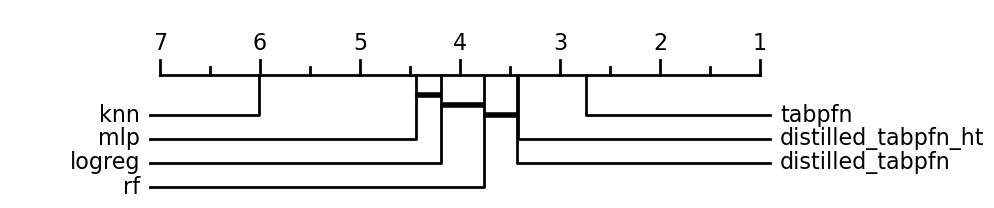

In [29]:
from tabpfn.scripts.critical_differences import draw_cd_diagram
res = draw_cd_diagram(bla, title="OVO ROC AUC")

In [52]:
import pandas as pd
results = pd.read_csv("sklearn_implementation_forward_mlp_model_big_bugfix_caching.csv", index_col=0)

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier




In [142]:
results

,mlp,distilled_tabpfn,distilled_tabpfn_ht,logreg,knn,rf,tabpfn,mlp_shallow,mlp_big,distilled_tabpfn_shallow,...,distilled_tabpfn_parameters_tuned,distilled_tabpfn_parameters_tuned_upsample,tabpfn_32,tabpfn_mine,tabpfn_mine_32,tabpfn_distilled_tuned_mine,distilled_tabpfn_parameters_tuned_upsample_wrong_fit,distilled_tabpfn_parameters_tuned_upsample_per_batch,forward_linear,forward_mlp
breast-cancer,0.705165,0.719032,0.718443,0.694928,0.637934,0.683816,0.722461,0.710050,0.669491,0.712884,...,0.727260,0.723659,0.723902,0.720337,0.718314,0.727260,0.669577,0.712704,0.696557,0.651133
colic,0.885905,0.885719,0.885253,0.875698,0.847037,0.913075,0.894787,0.891158,0.861414,0.882956,...,0.879458,0.880952,0.896212,0.897720,0.899814,0.879458,0.864014,0.882314,NaN,NaN
dermatology,0.998480,NaN,NaN,0.998870,0.996039,0.999330,NaN,0.998577,0.998232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sonar,0.934220,0.947244,0.947698,0.870630,0.897559,0.928207,0.947794,0.936975,0.906486,0.937920,...,0.921612,0.923021,0.943153,0.957985,0.955668,0.921612,0.930003,0.940401,0.864910,0.855627
glass,0.903652,0.905528,0.905942,0.881423,0.878902,0.944137,0.938821,0.879479,0.875131,0.847782,...,0.936122,0.931284,0.941514,0.936975,0.940563,0.936122,0.911967,0.926118,0.856450,0.846307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
regime_alimentaire,0.949590,0.945944,0.945944,0.961458,0.901349,0.955579,0.927367,0.933262,0.953997,0.931992,...,0.937027,0.926744,0.927580,0.936719,0.930469,0.937027,0.924069,0.928346,0.873067,0.785393
iris-example,0.995333,0.997000,0.997000,0.997333,0.991500,0.995333,0.997000,0.991000,0.995000,0.991000,...,0.995667,0.996000,0.997000,0.997000,0.997000,0.995667,0.996333,0.996333,0.997000,0.998000
Touch2,0.973185,0.981328,0.981394,0.952478,0.949996,0.979879,0.988497,0.948442,0.972864,0.948922,...,0.985752,0.984074,0.990170,0.988677,0.990548,0.985752,0.980152,0.981755,0.915866,0.792470
penguins,0.999797,0.999797,0.999797,0.999797,0.999638,0.999152,0.999797,1.000000,0.999333,0.999841,...,0.999797,0.999797,0.999797,0.999797,0.999797,0.999797,0.999797,0.999797,0.999921,0.999514


In [85]:
results['forward_mlp_model_big_bugfix_caching'] = np.NaN
results['forward_mlp_model_big_bugfix_caching_permutations'] = np.NaN


In [86]:
models = {'forward_mlp_model_big_bugfix_caching': make_forward_mlp_model_big_bugfix_caching,
         'forward_mlp_model_big_bugfix_caching_permutations': make_forward_mlp_model_big_bugfix_caching_permutations}

for model in models:
    if model not in results.columns:
        results[model] = np.NaN

In [87]:
from sklearn.model_selection import cross_validate
from tqdm import tqdm

for ds_name, X, y, categorical_features, _, _ in tqdm(cc_valid_datasets_multiclass):
    print(ds_name)
    for model_name, model_creator in models.items():
        if not np.isnan(results.loc[ds_name, model_name]):
            continue
        print(model_name)
        clf = model_creator(categorical_features)
        if X.shape[1] > 100:
            X = X[:, :100]
        try:
            scores = cross_validate(clf, X, y, scoring="roc_auc_ovo", error_score="raise")
            score = scores['test_score'].mean()
        except Exception as e:
            print(str(e))
            score = np.NaN
        results.loc[ds_name, model_name] = score

  0%|                                                                                                                                                                                                                                                 | 0/149 [00:00<?, ?it/s]

breast-cancer
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  2%|████▋                                                                                                                                                                                                                                    | 3/149 [00:03<02:29,  1.02s/it]

colic
forward_mlp_model_big_bugfix_caching
Trying to create tensor with negative dimension -47: [294, -47]
forward_mlp_model_big_bugfix_caching_permutations
Trying to create tensor with negative dimension -47: [294, -47]
dermatology
forward_mlp_model_big_bugfix_caching
Trying to create tensor with negative dimension -30: [292, -30]
forward_mlp_model_big_bugfix_caching_permutations
Trying to create tensor with negative dimension -30: [292, -30]
sonar
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  3%|██████▎                                                                                                                                                                                                                                  | 4/149 [00:07<04:17,  1.77s/it]

glass
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  3%|███████▊                                                                                                                                                                                                                                 | 5/149 [00:10<05:53,  2.46s/it]

haberman
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  4%|█████████▍                                                                                                                                                                                                                               | 6/149 [00:13<06:02,  2.53s/it]

tae
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  5%|██████████▉                                                                                                                                                                                                                              | 7/149 [00:15<05:27,  2.30s/it]

heart-c
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  5%|████████████▌                                                                                                                                                                                                                            | 8/149 [00:17<05:16,  2.24s/it]

heart-h
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  6%|██████████████                                                                                                                                                                                                                           | 9/149 [00:19<05:01,  2.15s/it]

heart-statlog
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  7%|███████████████▌                                                                                                                                                                                                                        | 10/149 [00:22<05:34,  2.41s/it]

hepatitis
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  7%|█████████████████▏                                                                                                                                                                                                                      | 11/149 [00:24<05:10,  2.25s/it]

vote
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  8%|██████████████████▋                                                                                                                                                                                                                     | 12/149 [00:27<05:28,  2.40s/it]

ionosphere
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  9%|████████████████████▏                                                                                                                                                                                                                   | 13/149 [00:29<05:12,  2.30s/it]

iris
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


  9%|█████████████████████▊                                                                                                                                                                                                                  | 14/149 [00:31<04:53,  2.17s/it]

wine
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 10%|███████████████████████▎                                                                                                                                                                                                                | 15/149 [00:33<04:57,  2.22s/it]

hayes-roth
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 11%|████████████████████████▉                                                                                                                                                                                                               | 16/149 [00:35<05:11,  2.34s/it]

monks-problems-1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 11%|██████████████████████████▍                                                                                                                                                                                                             | 17/149 [00:38<05:24,  2.46s/it]

monks-problems-2
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 12%|████████████████████████████                                                                                                                                                                                                            | 18/149 [00:41<05:23,  2.47s/it]

monks-problems-3
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 13%|█████████████████████████████▌                                                                                                                                                                                                          | 19/149 [00:43<05:21,  2.47s/it]

SPECT
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 13%|███████████████████████████████▏                                                                                                                                                                                                        | 20/149 [00:46<05:15,  2.45s/it]

SPECTF
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 14%|████████████████████████████████▋                                                                                                                                                                                                       | 21/149 [00:48<05:05,  2.39s/it]

grub-damage
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 15%|██████████████████████████████████▎                                                                                                                                                                                                     | 22/149 [00:50<04:51,  2.29s/it]

synthetic_control
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 15%|███████████████████████████████████▊                                                                                                                                                                                                    | 23/149 [00:53<05:04,  2.42s/it]

prnn_crabs
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 16%|█████████████████████████████████████▎                                                                                                                                                                                                  | 24/149 [00:55<04:55,  2.36s/it]

analcatdata_lawsuit
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 17%|██████████████████████████████████████▉                                                                                                                                                                                                 | 25/149 [00:57<04:46,  2.31s/it]

irish
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 17%|████████████████████████████████████████▍                                                                                                                                                                                               | 26/149 [01:00<05:19,  2.60s/it]

analcatdata_broadwaymult
forward_mlp_model_big_bugfix_caching
Trying to create tensor with negative dimension -4: [228, -4]
forward_mlp_model_big_bugfix_caching_permutations
Trying to create tensor with negative dimension -4: [228, -4]
analcatdata_reviewer
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 19%|███████████████████████████████████████████▌                                                                                                                                                                                            | 28/149 [01:03<04:13,  2.10s/it]

backache
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 19%|█████████████████████████████████████████████▏                                                                                                                                                                                          | 29/149 [01:06<04:27,  2.23s/it]

prnn_synth
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 20%|██████████████████████████████████████████████▋                                                                                                                                                                                         | 30/149 [01:09<04:39,  2.35s/it]

schizo
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 21%|████████████████████████████████████████████████▎                                                                                                                                                                                       | 31/149 [01:12<04:55,  2.50s/it]

profb
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 21%|█████████████████████████████████████████████████▊                                                                                                                                                                                      | 32/149 [01:14<05:01,  2.58s/it]

analcatdata_germangss
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 22%|███████████████████████████████████████████████████▍                                                                                                                                                                                    | 33/149 [01:17<04:46,  2.47s/it]

biomed
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 23%|████████████████████████████████████████████████████▉                                                                                                                                                                                   | 34/149 [01:19<04:32,  2.37s/it]

rmftsa_sleepdata
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 23%|██████████████████████████████████████████████████████▍                                                                                                                                                                                 | 35/149 [01:23<05:27,  2.87s/it]

diggle_table_a2
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 24%|████████████████████████████████████████████████████████                                                                                                                                                                                | 36/149 [01:25<05:20,  2.83s/it]

rmftsa_ladata
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 25%|█████████████████████████████████████████████████████████▌                                                                                                                                                                              | 37/149 [01:28<05:09,  2.77s/it]

pwLinear
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 26%|███████████████████████████████████████████████████████████▏                                                                                                                                                                            | 38/149 [01:30<04:40,  2.53s/it]

analcatdata_vineyard
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 26%|████████████████████████████████████████████████████████████▋                                                                                                                                                                           | 39/149 [01:33<04:41,  2.56s/it]

machine_cpu
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 27%|██████████████████████████████████████████████████████████████▎                                                                                                                                                                         | 40/149 [01:35<04:34,  2.52s/it]

pharynx
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 28%|███████████████████████████████████████████████████████████████▊                                                                                                                                                                        | 41/149 [01:38<04:37,  2.57s/it]

auto_price
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 28%|█████████████████████████████████████████████████████████████████▍                                                                                                                                                                      | 42/149 [01:40<04:28,  2.51s/it]

servo
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 29%|██████████████████████████████████████████████████████████████████▉                                                                                                                                                                     | 43/149 [01:42<04:17,  2.43s/it]

analcatdata_wildcat
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 30%|████████████████████████████████████████████████████████████████████▌                                                                                                                                                                   | 44/149 [01:44<03:58,  2.27s/it]

pm10
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 30%|██████████████████████████████████████████████████████████████████████                                                                                                                                                                  | 45/149 [01:47<04:23,  2.53s/it]

wisconsin
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 31%|███████████████████████████████████████████████████████████████████████▌                                                                                                                                                                | 46/149 [01:50<04:18,  2.51s/it]

autoPrice
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 32%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                                                              | 47/149 [01:53<04:25,  2.61s/it]

meta
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 32%|██████████████████████████████████████████████████████████████████████████▋                                                                                                                                                             | 48/149 [01:56<04:41,  2.79s/it]

analcatdata_apnea3
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                           | 49/149 [01:59<04:48,  2.88s/it]

analcatdata_apnea2
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 34%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                          | 50/149 [02:02<04:53,  2.96s/it]

analcatdata_apnea1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 34%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                        | 51/149 [02:05<04:58,  3.05s/it]

disclosure_x_bias
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 35%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                       | 52/149 [02:10<05:29,  3.40s/it]

bodyfat
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 36%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                     | 53/149 [02:13<05:19,  3.32s/it]

cleveland
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 36%|████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                    | 54/149 [02:15<04:57,  3.14s/it]

triazines
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 37%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                  | 55/149 [02:18<04:43,  3.02s/it]

disclosure_x_tampered
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 38%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                | 56/149 [02:22<05:10,  3.34s/it]

cpu
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 38%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                               | 57/149 [02:26<05:03,  3.30s/it]

cholesterol
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 39%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                             | 58/149 [02:28<04:48,  3.17s/it]

chscase_funds
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 40%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                            | 59/149 [02:31<04:19,  2.88s/it]

pbcseq
forward_mlp_model_big_bugfix_caching
Trying to create tensor with negative dimension -791: [1556, -791]
forward_mlp_model_big_bugfix_caching_permutations
Trying to create tensor with negative dimension -791: [1556, -791]
pbc
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 41%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                         | 61/149 [02:35<03:35,  2.45s/it]

rmftsa_ctoarrivals
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 42%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                       | 62/149 [02:38<04:04,  2.81s/it]

chscase_vine2
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 42%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                      | 63/149 [02:42<04:26,  3.10s/it]

chatfield_4
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 43%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                    | 64/149 [02:46<04:34,  3.23s/it]

boston_corrected
forward_mlp_model_big_bugfix_caching
Trying to create tensor with negative dimension -12: [404, -12]
forward_mlp_model_big_bugfix_caching_permutations
Trying to create tensor with negative dimension -12: [404, -12]
sensory
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 44%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                 | 66/149 [02:51<04:04,  2.94s/it]

disclosure_x_noise
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 45%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                               | 67/149 [02:56<04:38,  3.39s/it]

autoMpg
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                              | 68/149 [03:00<04:44,  3.52s/it]

kdd_el_nino-small
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 46%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                            | 69/149 [03:05<05:11,  3.89s/it]

autoHorse
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                           | 70/149 [03:08<04:49,  3.67s/it]

stock
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                         | 71/149 [03:14<05:36,  4.31s/it]

breastTumor
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 48%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                        | 72/149 [03:16<04:52,  3.79s/it]

analcatdata_gsssexsurvey
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 73/149 [03:19<04:18,  3.40s/it]

boston
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                    | 74/149 [03:22<04:14,  3.40s/it]

fishcatch
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                   | 75/149 [03:25<04:01,  3.26s/it]

vinnie
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                 | 76/149 [03:28<03:55,  3.22s/it]

mu284
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                | 77/149 [03:31<03:55,  3.27s/it]

no2
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                              | 78/149 [03:35<03:49,  3.24s/it]

chscase_geyser1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                             | 79/149 [03:38<03:43,  3.19s/it]

chscase_census6
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 80/149 [03:41<03:38,  3.16s/it]

chscase_census5
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 81/149 [03:44<03:29,  3.08s/it]

chscase_census4
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                        | 82/149 [03:47<03:26,  3.08s/it]

chscase_census3
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                      | 83/149 [03:50<03:24,  3.10s/it]

chscase_census2
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 84/149 [03:53<03:27,  3.19s/it]

plasma_retinol
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 85/149 [03:56<03:22,  3.16s/it]

visualizing_galaxy
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 86/149 [03:59<03:15,  3.10s/it]

colleges_usnews
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 87/149 [04:06<04:09,  4.03s/it]

disclosure_z
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                               | 88/149 [04:09<04:01,  3.95s/it]

socmob
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 89/149 [04:14<04:11,  4.19s/it]

chscase_whale
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 90/149 [04:16<03:28,  3.54s/it]

water-treatment
forward_mlp_model_big_bugfix_caching
Trying to create tensor with negative dimension -2857: [421, -2857]
forward_mlp_model_big_bugfix_caching_permutations
Trying to create tensor with negative dimension -2857: [421, -2857]
lowbwt
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 92/149 [04:18<02:15,  2.37s/it]

arsenic-female-bladder
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                       | 93/149 [04:21<02:16,  2.43s/it]

analcatdata_halloffame
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 94/149 [04:26<02:50,  3.11s/it]

analcatdata_birthday
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 95/149 [04:29<02:44,  3.05s/it]

analcatdata_draft
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 96/149 [04:32<02:38,  2.99s/it]

collins
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 97/149 [04:34<02:31,  2.90s/it]

prnn_fglass
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 98/149 [04:36<02:15,  2.67s/it]

jEdit_4.2_4.3
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 99/149 [04:39<02:13,  2.67s/it]

mc2
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 100/149 [04:41<02:02,  2.50s/it]

mw1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 101/149 [04:43<01:57,  2.44s/it]

jEdit_4.0_4.2
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 102/149 [04:45<01:49,  2.33s/it]

PopularKids
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 103/149 [04:48<01:49,  2.37s/it]

teachingAssistant
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 104/149 [04:50<01:40,  2.24s/it]

lungcancer_GSE31210
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 105/149 [04:52<01:35,  2.17s/it]

MegaWatt1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 106/149 [04:54<01:31,  2.13s/it]

PizzaCutter1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 107/149 [04:57<01:39,  2.36s/it]

PizzaCutter3
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 108/149 [05:01<01:57,  2.86s/it]

CostaMadre1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 109/149 [05:04<01:53,  2.84s/it]

CastMetal1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 110/149 [05:06<01:45,  2.72s/it]

KnuggetChase3
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 111/149 [05:08<01:38,  2.60s/it]

PieChart1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 112/149 [05:12<01:50,  3.00s/it]

PieChart3
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 113/149 [05:17<02:03,  3.43s/it]

parkinsons
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 114/149 [05:19<01:47,  3.07s/it]

planning-relax
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 115/149 [05:21<01:38,  2.90s/it]

qualitative-bankruptcy
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 116/149 [05:24<01:34,  2.86s/it]

sa-heart
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 117/149 [05:28<01:41,  3.17s/it]

seeds
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 118/149 [05:31<01:36,  3.10s/it]

thoracic-surgery
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 119/149 [05:35<01:42,  3.43s/it]

user-knowledge
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 120/149 [05:38<01:34,  3.26s/it]

wholesale-customers
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 121/149 [05:41<01:29,  3.19s/it]

heart-long-beach
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 122/149 [05:44<01:24,  3.13s/it]

robot-failures-lp5
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 123/149 [05:47<01:19,  3.05s/it]

vertebra-column
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 124/149 [05:49<01:10,  2.83s/it]

Smartphone-Based_Recognition_of_Human_Activities
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 125/149 [05:52<01:06,  2.79s/it]

breast-cancer-dropped-missing-attributes-values
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 126/149 [05:55<01:03,  2.75s/it]

LED-display-domain-7digit
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 127/149 [05:59<01:09,  3.15s/it]

GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 128/149 [06:05<01:26,  4.10s/it]

calendarDOW
forward_mlp_model_big_bugfix_caching
Trying to create tensor with negative dimension -29: [319, -29]
forward_mlp_model_big_bugfix_caching_permutations
Trying to create tensor with negative dimension -29: [319, -29]
corral
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 130/149 [06:07<00:50,  2.64s/it]

mofn-3-7-10
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 131/149 [06:12<00:58,  3.26s/it]

thyroid-new
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 132/149 [06:14<00:49,  2.91s/it]

solar-flare
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 133/149 [06:16<00:43,  2.72s/it]

threeOf9
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 134/149 [06:19<00:40,  2.68s/it]

xd6
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 135/149 [06:23<00:41,  3.00s/it]

tokyo1
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 136/149 [06:26<00:41,  3.19s/it]

parity5_plus_5
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 137/149 [06:30<00:40,  3.39s/it]

cleve
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 138/149 [06:32<00:33,  3.01s/it]

cleveland-nominal
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 139/149 [06:34<00:27,  2.73s/it]

Australian
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 140/149 [06:37<00:24,  2.77s/it]

DiabeticMellitus
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 141/149 [06:39<00:20,  2.54s/it]

conference_attendance
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 142/149 [06:41<00:16,  2.34s/it]

CPMP-2015-runtime-classification
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 143/149 [06:44<00:14,  2.39s/it]

TuningSVMs
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 144/149 [06:45<00:11,  2.21s/it]

regime_alimentaire
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 145/149 [06:47<00:08,  2.12s/it]

iris-example
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 146/149 [06:49<00:06,  2.01s/it]

Touch2
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 147/149 [06:51<00:04,  2.04s/it]

penguins
forward_mlp_model_big_bugfix_caching
forward_mlp_model_big_bugfix_caching_permutations


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [06:53<00:00,  2.78s/it]

titanic
forward_mlp_model_big_bugfix_caching
Trying to create tensor with negative dimension -40: [712, -40]
forward_mlp_model_big_bugfix_caching_permutations
Trying to create tensor with negative dimension -40: [712, -40]


In [96]:
results.to_csv("sklearn_implementation_forward_mlp_model_big_bugfix_caching_permutations.csv")


In [89]:
results.isna().sum()

mlp                                                     0
distilled_tabpfn                                        8
distilled_tabpfn_ht                                     8
logreg                                                  0
knn                                                     0
rf                                                      0
tabpfn                                                  8
mlp_shallow                                             0
mlp_big                                                 0
distilled_tabpfn_shallow                                8
distilled_tabpfn_big                                    8
distilled_tabpfn_big_dropout                            8
distilled_tabpfn_big_long                               8
distilled_tabpfn_big_long_dropout                       8
distilled_tabpfn_big_layernorm                          8
distilled_tabpfn_parameters_tuned                       8
distilled_tabpfn_parameters_tuned_upsample              3
tabpfn_32     

In [90]:
results.columns

Index(['mlp', 'distilled_tabpfn', 'distilled_tabpfn_ht', 'logreg', 'knn', 'rf',
       'tabpfn', 'mlp_shallow', 'mlp_big', 'distilled_tabpfn_shallow',
       'distilled_tabpfn_big', 'distilled_tabpfn_big_dropout',
       'distilled_tabpfn_big_long', 'distilled_tabpfn_big_long_dropout',
       'distilled_tabpfn_big_layernorm', 'distilled_tabpfn_parameters_tuned',
       'distilled_tabpfn_parameters_tuned_upsample', 'tabpfn_32',
       'tabpfn_mine', 'tabpfn_mine_32', 'tabpfn_distilled_tuned_mine',
       'distilled_tabpfn_parameters_tuned_upsample_wrong_fit',
       'distilled_tabpfn_parameters_tuned_upsample_per_batch',
       'forward_linear', 'forward_mlp', 'forward_mlp_new',
       'forward_mlp_new_label_permutation',
       'forward_mlp_model_big_bugfix_caching',
       'forward_mlp_model_big_bugfix_caching_permutations'],
      dtype='object')

In [91]:
bla  = results.dropna().drop(columns=["tabpfn_distilled_tuned_mine"])[['mlp', 'distilled_tabpfn',  'logreg', 'knn', 'rf',
       'tabpfn',
 'distilled_tabpfn_parameters_tuned',
        'tabpfn_32',
       'tabpfn_mine', 'tabpfn_mine_32',
       'forward_linear', 'forward_mlp', 'forward_mlp_new', 'forward_mlp_new_label_permutation',
       'forward_mlp_model_big_bugfix_caching', 'forward_mlp_model_big_bugfix_caching_permutations']].stack().reset_index()
bla.columns = ['dataset_name', 'classifier_name', 'accuracy']
bla

,dataset_name,classifier_name,accuracy
0,breast-cancer,mlp,0.705165
1,breast-cancer,distilled_tabpfn,0.719032
2,breast-cancer,logreg,0.694928
3,breast-cancer,knn,0.637934
4,breast-cancer,rf,0.683816
...,...,...,...
2187,penguins,forward_mlp,0.999514
2188,penguins,forward_mlp_new,0.999797
2189,penguins,forward_mlp_new_label_permutation,0.999841
2190,penguins,forward_mlp_model_big_bugfix_caching,0.999841


['mlp' 'distilled_tabpfn' 'logreg' 'knn' 'rf' 'tabpfn'
 'distilled_tabpfn_parameters_tuned' 'tabpfn_32' 'tabpfn_mine'
 'tabpfn_mine_32' 'forward_linear' 'forward_mlp' 'forward_mlp_new'
 'forward_mlp_new_label_permutation'
 'forward_mlp_model_big_bugfix_caching'
 'forward_mlp_model_big_bugfix_caching_permutations']
distilled_tabpfn                                      9.0
distilled_tabpfn_parameters_tuned                     8.0
forward_linear                                        6.0
forward_mlp                                           4.0
forward_mlp_model_big_bugfix_caching                  0.0
forward_mlp_model_big_bugfix_caching_permutations     2.0
forward_mlp_new                                       3.0
forward_mlp_new_label_permutation                     3.0
knn                                                   2.0
logreg                                                9.0
mlp                                                   9.0
rf                                            

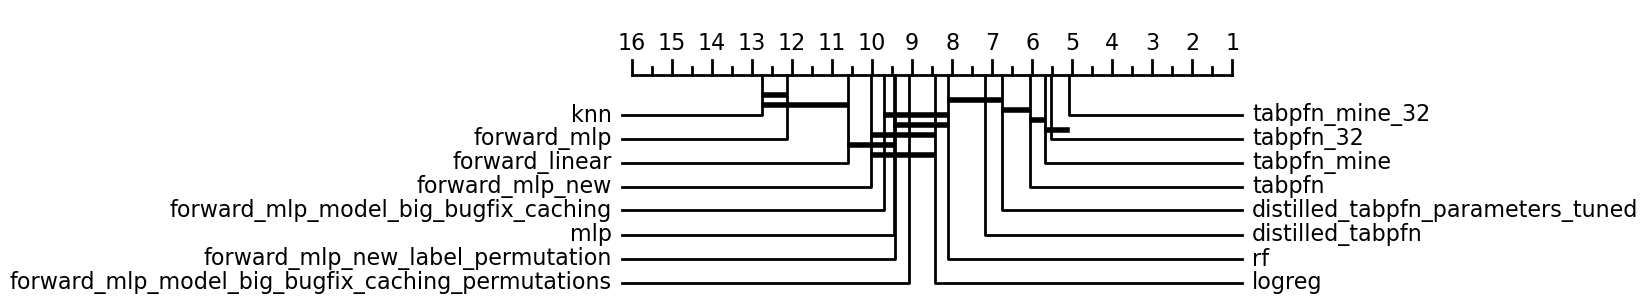

In [92]:
from tabpfn.scripts.critical_differences import draw_cd_diagram

res = draw_cd_diagram(bla, title="OVO ROC AUC")

In [93]:
results

,mlp,distilled_tabpfn,distilled_tabpfn_ht,logreg,knn,rf,tabpfn,mlp_shallow,mlp_big,distilled_tabpfn_shallow,...,tabpfn_mine_32,tabpfn_distilled_tuned_mine,distilled_tabpfn_parameters_tuned_upsample_wrong_fit,distilled_tabpfn_parameters_tuned_upsample_per_batch,forward_linear,forward_mlp,forward_mlp_new,forward_mlp_new_label_permutation,forward_mlp_model_big_bugfix_caching,forward_mlp_model_big_bugfix_caching_permutations
breast-cancer,0.705165,0.719032,0.718443,0.694928,0.637934,0.683816,0.722461,0.710050,0.669491,0.712884,...,0.718314,0.727260,0.669577,0.712704,0.696557,0.651133,0.681793,0.690603,0.688895,0.688020
colic,0.885905,0.885719,0.885253,0.875698,0.847037,0.913075,0.894787,0.891158,0.861414,0.882956,...,0.899814,0.879458,0.864014,0.882314,NaN,NaN,NaN,NaN,NaN,NaN
dermatology,0.998480,NaN,NaN,0.998870,0.996039,0.999330,NaN,0.998577,0.998232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sonar,0.934220,0.947244,0.947698,0.870630,0.897559,0.928207,0.947794,0.936975,0.906486,0.937920,...,0.955668,0.921612,0.930003,0.940401,0.864910,0.855627,0.862570,0.869392,0.866997,0.869279
glass,0.903652,0.905528,0.905942,0.881423,0.878902,0.944137,0.938821,0.879479,0.875131,0.847782,...,0.940563,0.936122,0.911967,0.926118,0.856450,0.846307,0.811603,0.880368,0.846599,0.859279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
regime_alimentaire,0.949590,0.945944,0.945944,0.961458,0.901349,0.955579,0.927367,0.933262,0.953997,0.931992,...,0.930469,0.937027,0.924069,0.928346,0.873067,0.785393,0.898043,0.896978,0.886537,0.897711
iris-example,0.995333,0.997000,0.997000,0.997333,0.991500,0.995333,0.997000,0.991000,0.995000,0.991000,...,0.997000,0.995667,0.996333,0.996333,0.997000,0.998000,0.996000,0.998000,0.998000,0.997333
Touch2,0.973185,0.981328,0.981394,0.952478,0.949996,0.979879,0.988497,0.948442,0.972864,0.948922,...,0.990548,0.985752,0.980152,0.981755,0.915866,0.792470,0.856818,0.937941,0.918776,0.940685
penguins,0.999797,0.999797,0.999797,0.999797,0.999638,0.999152,0.999797,1.000000,0.999333,0.999841,...,0.999797,0.999797,0.999797,0.999797,0.999921,0.999514,0.999797,0.999841,0.999841,0.999841


In [95]:
results[results.logreg > results.forward_mlp_model_big_bugfix_caching_permutations][['tabpfn', 'forward_mlp_model_big_bugfix_caching_permutations', 'logreg']]

,tabpfn,forward_mlp_model_big_bugfix_caching_permutations,logreg
breast-cancer,0.722461,0.688020,0.694928
sonar,0.947794,0.869279,0.870630
glass,0.938821,0.859279,0.881423
tae,0.702330,0.681098,0.687640
heart-c,0.908874,0.904578,0.910245
...,...,...,...
cleve,0.919048,0.916105,0.920443
CPMP-2015-runtime-classification,0.725124,0.707747,0.715892
TuningSVMs,0.761039,0.704199,0.729394
regime_alimentaire,0.927367,0.897711,0.961458


In [26]:
import pandas as pd
results_before = pd.read_csv("time_and_auc_comparison_distillation.csv", index_col=0)

In [27]:
results

fit_time  score_time  test_score
tabpfn_mine_32_no_onehot breast-cancer       0.000657    0.084888    0.721090
                         colic               0.000643    0.091676    0.772925
                         dermatology         0.000757    0.176644    0.998922
                         sonar               0.000564    0.210577    0.955668
                         glass               0.000503    0.083492    0.940563
...                                               ...         ...         ...
                         regime_alimentaire  0.000623    0.099826    0.978149
                         iris-example        0.000591    0.047172    0.997000
                         Touch2              0.000584    0.105734    0.990548
                         penguins            0.000601    0.081828    0.842079
                         titanic             0.002924    0.183651    0.864269

[144 rows x 3 columns]

In [23]:
models = {

             'tabpfn_mine_32_no_onehot': make_tabpfn_mine_32_no_onehot,

    
}


In [24]:
from sklearn.model_selection import cross_validate
from collections import defaultdict

results = defaultdict(dict)
for ds_name, X, y, categorical_features, _, _ in tqdm(cc_valid_datasets_multiclass):
    print(ds_name)
    for model_name, model_creator in models.items():
        print(model_name)
        clf = model_creator(categorical_features)
        if X.shape[1] > 100:
            X = X[:, :100]
        try:
            scores = cross_validate(clf, X, y, scoring="roc_auc_ovo", error_score="raise")
            score = pd.DataFrame(scores).mean()
        except Exception as e:
            print(str(e))
            score = np.NaN
        results[ds_name][model_name] = score

  0%|                                                                                                                                                                                                                                                 | 0/149 [00:00<?, ?it/s]

breast-cancer
tabpfn_mine_32_no_onehot


  1%|█▌                                                                                                                                                                                                                                       | 1/149 [00:01<04:14,  1.72s/it]

colic
tabpfn_mine_32_no_onehot


  1%|███▏                                                                                                                                                                                                                                     | 2/149 [00:03<04:15,  1.74s/it]

dermatology
tabpfn_mine_32_no_onehot


  2%|████▋                                                                                                                                                                                                                                    | 3/149 [00:05<04:43,  1.94s/it]

sonar
tabpfn_mine_32_no_onehot


  3%|██████▎                                                                                                                                                                                                                                  | 4/149 [00:07<04:58,  2.06s/it]

glass
tabpfn_mine_32_no_onehot


  3%|███████▊                                                                                                                                                                                                                                 | 5/149 [00:09<04:35,  1.91s/it]

haberman
tabpfn_mine_32_no_onehot


  4%|█████████▍                                                                                                                                                                                                                               | 6/149 [00:10<04:09,  1.75s/it]

tae
tabpfn_mine_32_no_onehot


  5%|██████████▉                                                                                                                                                                                                                              | 7/149 [00:12<03:59,  1.69s/it]

heart-c
tabpfn_mine_32_no_onehot


  5%|████████████▌                                                                                                                                                                                                                            | 8/149 [00:14<04:01,  1.71s/it]

heart-h
tabpfn_mine_32_no_onehot


  6%|██████████████                                                                                                                                                                                                                           | 9/149 [00:15<03:58,  1.70s/it]

heart-statlog
tabpfn_mine_32_no_onehot


  7%|███████████████▌                                                                                                                                                                                                                        | 10/149 [00:17<03:58,  1.71s/it]

hepatitis
tabpfn_mine_32_no_onehot


  7%|█████████████████▏                                                                                                                                                                                                                      | 11/149 [00:19<03:52,  1.69s/it]

vote
tabpfn_mine_32_no_onehot


  8%|██████████████████▋                                                                                                                                                                                                                     | 12/149 [00:21<03:58,  1.74s/it]

ionosphere
tabpfn_mine_32_no_onehot


  9%|████████████████████▏                                                                                                                                                                                                                   | 13/149 [00:23<04:16,  1.89s/it]

iris
tabpfn_mine_32_no_onehot


  9%|█████████████████████▊                                                                                                                                                                                                                  | 14/149 [00:25<04:09,  1.85s/it]

wine
tabpfn_mine_32_no_onehot


 10%|███████████████████████▎                                                                                                                                                                                                                | 15/149 [00:26<04:05,  1.83s/it]

hayes-roth
tabpfn_mine_32_no_onehot


 11%|████████████████████████▉                                                                                                                                                                                                               | 16/149 [00:28<03:54,  1.76s/it]

monks-problems-1
tabpfn_mine_32_no_onehot


 11%|██████████████████████████▍                                                                                                                                                                                                             | 17/149 [00:30<03:58,  1.81s/it]

monks-problems-2
tabpfn_mine_32_no_onehot


 12%|████████████████████████████                                                                                                                                                                                                            | 18/149 [00:32<04:00,  1.84s/it]

monks-problems-3
tabpfn_mine_32_no_onehot


 13%|█████████████████████████████▌                                                                                                                                                                                                          | 19/149 [00:34<04:01,  1.85s/it]

SPECT
tabpfn_mine_32_no_onehot


 13%|███████████████████████████████▏                                                                                                                                                                                                        | 20/149 [00:36<04:10,  1.94s/it]

SPECTF
tabpfn_mine_32_no_onehot


 14%|████████████████████████████████▋                                                                                                                                                                                                       | 21/149 [00:38<04:30,  2.12s/it]

grub-damage
tabpfn_mine_32_no_onehot


 15%|██████████████████████████████████▎                                                                                                                                                                                                     | 22/149 [00:40<04:14,  2.01s/it]

synthetic_control
tabpfn_mine_32_no_onehot


 15%|███████████████████████████████████▊                                                                                                                                                                                                    | 23/149 [00:43<04:46,  2.27s/it]

prnn_crabs
tabpfn_mine_32_no_onehot


 16%|█████████████████████████████████████▎                                                                                                                                                                                                  | 24/149 [00:45<04:22,  2.10s/it]

analcatdata_lawsuit
tabpfn_mine_32_no_onehot


 17%|██████████████████████████████████████▉                                                                                                                                                                                                 | 25/149 [00:47<04:07,  2.00s/it]

irish
tabpfn_mine_32_no_onehot


 17%|████████████████████████████████████████▍                                                                                                                                                                                               | 26/149 [00:48<03:56,  1.93s/it]

analcatdata_broadwaymult
tabpfn_mine_32_no_onehot


 18%|██████████████████████████████████████████                                                                                                                                                                                              | 27/149 [00:50<03:50,  1.89s/it]

analcatdata_reviewer
tabpfn_mine_32_no_onehot


 19%|███████████████████████████████████████████▌                                                                                                                                                                                            | 28/149 [00:52<03:45,  1.86s/it]

backache
tabpfn_mine_32_no_onehot


 19%|█████████████████████████████████████████████▏                                                                                                                                                                                          | 29/149 [00:54<03:46,  1.89s/it]

prnn_synth
tabpfn_mine_32_no_onehot


 20%|██████████████████████████████████████████████▋                                                                                                                                                                                         | 30/149 [00:55<03:30,  1.77s/it]

schizo
tabpfn_mine_32_no_onehot


 21%|████████████████████████████████████████████████▎                                                                                                                                                                                       | 31/149 [00:57<03:29,  1.78s/it]

profb
tabpfn_mine_32_no_onehot


 21%|█████████████████████████████████████████████████▊                                                                                                                                                                                      | 32/149 [00:59<03:40,  1.89s/it]

analcatdata_germangss
tabpfn_mine_32_no_onehot


 22%|███████████████████████████████████████████████████▍                                                                                                                                                                                    | 33/149 [01:01<03:37,  1.88s/it]

biomed
tabpfn_mine_32_no_onehot


 23%|████████████████████████████████████████████████████▉                                                                                                                                                                                   | 34/149 [01:03<03:30,  1.83s/it]

rmftsa_sleepdata
tabpfn_mine_32_no_onehot


 23%|██████████████████████████████████████████████████████▍                                                                                                                                                                                 | 35/149 [01:05<03:35,  1.89s/it]

diggle_table_a2
tabpfn_mine_32_no_onehot


 24%|████████████████████████████████████████████████████████                                                                                                                                                                                | 36/149 [01:07<03:32,  1.88s/it]

rmftsa_ladata
tabpfn_mine_32_no_onehot


 25%|█████████████████████████████████████████████████████████▌                                                                                                                                                                              | 37/149 [01:09<03:42,  1.99s/it]

pwLinear
tabpfn_mine_32_no_onehot


 26%|███████████████████████████████████████████████████████████▏                                                                                                                                                                            | 38/149 [01:11<03:30,  1.90s/it]

analcatdata_vineyard
tabpfn_mine_32_no_onehot


 26%|████████████████████████████████████████████████████████████▋                                                                                                                                                                           | 39/149 [01:12<03:23,  1.85s/it]

machine_cpu
tabpfn_mine_32_no_onehot


 27%|██████████████████████████████████████████████████████████████▎                                                                                                                                                                         | 40/149 [01:14<03:13,  1.78s/it]

pharynx
tabpfn_mine_32_no_onehot


 28%|███████████████████████████████████████████████████████████████▊                                                                                                                                                                        | 41/149 [01:16<03:10,  1.76s/it]

auto_price
tabpfn_mine_32_no_onehot


 28%|█████████████████████████████████████████████████████████████████▍                                                                                                                                                                      | 42/149 [01:18<03:09,  1.77s/it]

servo
tabpfn_mine_32_no_onehot


 29%|██████████████████████████████████████████████████████████████████▉                                                                                                                                                                     | 43/149 [01:19<03:00,  1.71s/it]

analcatdata_wildcat
tabpfn_mine_32_no_onehot


 30%|████████████████████████████████████████████████████████████████████▌                                                                                                                                                                   | 44/149 [01:21<02:55,  1.67s/it]

pm10
tabpfn_mine_32_no_onehot


 30%|██████████████████████████████████████████████████████████████████████                                                                                                                                                                  | 45/149 [01:23<03:01,  1.75s/it]

wisconsin
tabpfn_mine_32_no_onehot


 31%|███████████████████████████████████████████████████████████████████████▌                                                                                                                                                                | 46/149 [01:25<03:08,  1.83s/it]

autoPrice
tabpfn_mine_32_no_onehot


 32%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                                                              | 47/149 [01:27<03:13,  1.90s/it]

meta
tabpfn_mine_32_no_onehot


 32%|██████████████████████████████████████████████████████████████████████████▋                                                                                                                                                             | 48/149 [01:29<03:18,  1.97s/it]

analcatdata_apnea3
tabpfn_mine_32_no_onehot


 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                           | 49/149 [01:30<03:06,  1.86s/it]

analcatdata_apnea2
tabpfn_mine_32_no_onehot


 34%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                          | 50/149 [01:32<02:58,  1.80s/it]

analcatdata_apnea1
tabpfn_mine_32_no_onehot


 34%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                        | 51/149 [01:34<02:51,  1.75s/it]

disclosure_x_bias
tabpfn_mine_32_no_onehot


 35%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                       | 52/149 [01:35<02:47,  1.73s/it]

bodyfat
tabpfn_mine_32_no_onehot


 36%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                     | 53/149 [01:37<02:47,  1.74s/it]

cleveland
tabpfn_mine_32_no_onehot


 36%|████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                    | 54/149 [01:39<02:48,  1.78s/it]

triazines
tabpfn_mine_32_no_onehot


 37%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                  | 55/149 [01:41<03:04,  1.96s/it]

disclosure_x_tampered
tabpfn_mine_32_no_onehot


 38%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                | 56/149 [01:43<02:54,  1.88s/it]

cpu
tabpfn_mine_32_no_onehot


 38%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                               | 57/149 [01:45<02:55,  1.91s/it]

cholesterol
tabpfn_mine_32_no_onehot


 39%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                             | 58/149 [01:47<03:00,  1.98s/it]

chscase_funds
tabpfn_mine_32_no_onehot


 40%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                            | 59/149 [01:49<02:48,  1.88s/it]

pbcseq
tabpfn_mine_32_no_onehot


 40%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                          | 60/149 [01:49<02:10,  1.46s/it]

⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machine crashing (due to quadratic memory scaling of TabPFN). Please confirm you want to run by passing overwrite_warning=True to the fit function.
pbc
tabpfn_mine_32_no_onehot


 41%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                         | 61/149 [01:51<02:21,  1.61s/it]

rmftsa_ctoarrivals
tabpfn_mine_32_no_onehot


 42%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                       | 62/149 [01:53<02:19,  1.60s/it]

chscase_vine2
tabpfn_mine_32_no_onehot


 42%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                      | 63/149 [01:55<02:17,  1.60s/it]

chatfield_4
tabpfn_mine_32_no_onehot


 43%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                    | 64/149 [01:56<02:24,  1.70s/it]

boston_corrected
tabpfn_mine_32_no_onehot


 44%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                  | 65/149 [01:59<02:37,  1.87s/it]

sensory
tabpfn_mine_32_no_onehot


 44%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                 | 66/149 [02:01<02:43,  1.97s/it]

disclosure_x_noise
tabpfn_mine_32_no_onehot


 45%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                               | 67/149 [02:03<02:36,  1.91s/it]

autoMpg
tabpfn_mine_32_no_onehot


 46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                              | 68/149 [02:05<02:33,  1.90s/it]

kdd_el_nino-small
tabpfn_mine_32_no_onehot


 46%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                            | 69/149 [02:07<02:44,  2.05s/it]

autoHorse
tabpfn_mine_32_no_onehot


 47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                           | 70/149 [02:09<02:38,  2.01s/it]

stock
tabpfn_mine_32_no_onehot


 48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                         | 71/149 [02:11<02:47,  2.15s/it]

breastTumor
tabpfn_mine_32_no_onehot


 48%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                        | 72/149 [02:13<02:37,  2.05s/it]

analcatdata_gsssexsurvey
tabpfn_mine_32_no_onehot


 49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 73/149 [02:15<02:28,  1.96s/it]

boston
tabpfn_mine_32_no_onehot


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                    | 74/149 [02:17<02:29,  1.99s/it]

fishcatch
tabpfn_mine_32_no_onehot


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                   | 75/149 [02:19<02:19,  1.88s/it]

vinnie
tabpfn_mine_32_no_onehot


 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                 | 76/149 [02:20<02:10,  1.79s/it]

mu284
tabpfn_mine_32_no_onehot


 52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                | 77/149 [02:22<02:09,  1.80s/it]

no2
tabpfn_mine_32_no_onehot


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                              | 78/149 [02:24<02:11,  1.85s/it]

chscase_geyser1
tabpfn_mine_32_no_onehot


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                             | 79/149 [02:26<02:07,  1.82s/it]

chscase_census6
tabpfn_mine_32_no_onehot


 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 80/149 [02:28<02:05,  1.82s/it]

chscase_census5
tabpfn_mine_32_no_onehot


 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 81/149 [02:29<02:04,  1.83s/it]

chscase_census4
tabpfn_mine_32_no_onehot


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                        | 82/149 [02:31<02:03,  1.84s/it]

chscase_census3
tabpfn_mine_32_no_onehot


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                      | 83/149 [02:33<02:01,  1.85s/it]

chscase_census2
tabpfn_mine_32_no_onehot


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 84/149 [02:35<02:01,  1.87s/it]

plasma_retinol
tabpfn_mine_32_no_onehot


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 85/149 [02:37<02:00,  1.88s/it]

visualizing_galaxy
tabpfn_mine_32_no_onehot


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 86/149 [02:39<01:53,  1.80s/it]

colleges_usnews
tabpfn_mine_32_no_onehot


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 87/149 [02:39<01:27,  1.41s/it]

⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machine crashing (due to quadratic memory scaling of TabPFN). Please confirm you want to run by passing overwrite_warning=True to the fit function.
disclosure_z
tabpfn_mine_32_no_onehot


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                               | 88/149 [02:41<01:31,  1.50s/it]

socmob
tabpfn_mine_32_no_onehot


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 89/149 [02:43<01:45,  1.76s/it]

chscase_whale
tabpfn_mine_32_no_onehot


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 90/149 [02:45<01:42,  1.74s/it]

water-treatment
tabpfn_mine_32_no_onehot


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 91/149 [02:47<01:46,  1.84s/it]

lowbwt
tabpfn_mine_32_no_onehot


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 92/149 [02:49<01:43,  1.81s/it]

arsenic-female-bladder
tabpfn_mine_32_no_onehot


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                       | 93/149 [02:50<01:40,  1.79s/it]

analcatdata_halloffame
tabpfn_mine_32_no_onehot


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 94/149 [02:51<01:16,  1.39s/it]

⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machine crashing (due to quadratic memory scaling of TabPFN). Please confirm you want to run by passing overwrite_warning=True to the fit function.
analcatdata_birthday
tabpfn_mine_32_no_onehot


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 95/149 [02:52<01:18,  1.45s/it]

analcatdata_draft
tabpfn_mine_32_no_onehot


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 96/149 [02:54<01:21,  1.53s/it]

collins
tabpfn_mine_32_no_onehot


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 97/149 [02:56<01:30,  1.74s/it]

prnn_fglass
tabpfn_mine_32_no_onehot


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 98/149 [02:58<01:28,  1.74s/it]

jEdit_4.2_4.3
tabpfn_mine_32_no_onehot


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 99/149 [03:00<01:29,  1.79s/it]

mc2
tabpfn_mine_32_no_onehot


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 100/149 [03:02<01:33,  1.91s/it]

mw1
tabpfn_mine_32_no_onehot


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 101/149 [03:05<01:38,  2.05s/it]

jEdit_4.0_4.2
tabpfn_mine_32_no_onehot


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 102/149 [03:06<01:32,  1.98s/it]

PopularKids
tabpfn_mine_32_no_onehot


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 103/149 [03:08<01:31,  1.98s/it]

teachingAssistant
tabpfn_mine_32_no_onehot


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 104/149 [03:10<01:25,  1.89s/it]

lungcancer_GSE31210
tabpfn_mine_32_no_onehot


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 105/149 [03:12<01:24,  1.92s/it]

MegaWatt1
tabpfn_mine_32_no_onehot


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 106/149 [03:14<01:25,  2.00s/it]

PizzaCutter1
tabpfn_mine_32_no_onehot


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 107/149 [03:17<01:32,  2.20s/it]

PizzaCutter3
tabpfn_mine_32_no_onehot


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 108/149 [03:20<01:40,  2.45s/it]

CostaMadre1
tabpfn_mine_32_no_onehot


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 109/149 [03:22<01:33,  2.35s/it]

CastMetal1
tabpfn_mine_32_no_onehot


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 110/149 [03:24<01:31,  2.35s/it]

KnuggetChase3
tabpfn_mine_32_no_onehot


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 111/149 [03:27<01:28,  2.32s/it]

PieChart1
tabpfn_mine_32_no_onehot


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 112/149 [03:29<01:31,  2.46s/it]

PieChart3
tabpfn_mine_32_no_onehot


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 113/149 [03:33<01:36,  2.67s/it]

parkinsons
tabpfn_mine_32_no_onehot


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 114/149 [03:35<01:28,  2.52s/it]

planning-relax
tabpfn_mine_32_no_onehot


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 115/149 [03:37<01:20,  2.36s/it]

qualitative-bankruptcy
tabpfn_mine_32_no_onehot


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 116/149 [03:39<01:13,  2.22s/it]

sa-heart
tabpfn_mine_32_no_onehot


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 117/149 [03:41<01:10,  2.19s/it]

seeds
tabpfn_mine_32_no_onehot


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 118/149 [03:43<01:04,  2.08s/it]

thoracic-surgery
tabpfn_mine_32_no_onehot


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 119/149 [03:45<01:03,  2.11s/it]

user-knowledge
tabpfn_mine_32_no_onehot


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 120/149 [03:47<01:00,  2.10s/it]

wholesale-customers
tabpfn_mine_32_no_onehot


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 121/149 [03:49<00:58,  2.11s/it]

heart-long-beach
tabpfn_mine_32_no_onehot


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 122/149 [03:51<00:57,  2.14s/it]

robot-failures-lp5
tabpfn_mine_32_no_onehot


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 123/149 [03:54<01:01,  2.36s/it]

vertebra-column
tabpfn_mine_32_no_onehot


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 124/149 [03:56<00:55,  2.23s/it]

Smartphone-Based_Recognition_of_Human_Activities
tabpfn_mine_32_no_onehot


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 125/149 [03:59<00:56,  2.35s/it]

breast-cancer-dropped-missing-attributes-values
tabpfn_mine_32_no_onehot


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 126/149 [04:01<00:50,  2.21s/it]

LED-display-domain-7digit
tabpfn_mine_32_no_onehot


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 127/149 [04:03<00:49,  2.23s/it]

GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1
tabpfn_mine_32_no_onehot


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 128/149 [04:03<00:35,  1.71s/it]

⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machine crashing (due to quadratic memory scaling of TabPFN). Please confirm you want to run by passing overwrite_warning=True to the fit function.
calendarDOW
tabpfn_mine_32_no_onehot


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 129/149 [04:06<00:37,  1.88s/it]

corral
tabpfn_mine_32_no_onehot


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 130/149 [04:07<00:34,  1.83s/it]

mofn-3-7-10
tabpfn_mine_32_no_onehot


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 131/149 [04:08<00:25,  1.43s/it]

⚠️ WARNING: TabPFN is not made for datasets with a trainingsize > 1024. Prediction might take a while, be less reliable. We advise not to run datasets > 10k samples, which might lead to your machine crashing (due to quadratic memory scaling of TabPFN). Please confirm you want to run by passing overwrite_warning=True to the fit function.
thyroid-new
tabpfn_mine_32_no_onehot


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 132/149 [04:10<00:26,  1.56s/it]

solar-flare
tabpfn_mine_32_no_onehot


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 133/149 [04:12<00:27,  1.69s/it]

threeOf9
tabpfn_mine_32_no_onehot


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 134/149 [04:14<00:27,  1.81s/it]

xd6
tabpfn_mine_32_no_onehot


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 135/149 [04:16<00:29,  2.09s/it]

tokyo1
tabpfn_mine_32_no_onehot


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 136/149 [04:20<00:30,  2.38s/it]

parity5_plus_5
tabpfn_mine_32_no_onehot


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 137/149 [04:22<00:30,  2.51s/it]

cleve
tabpfn_mine_32_no_onehot


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 138/149 [04:24<00:25,  2.35s/it]

cleveland-nominal
tabpfn_mine_32_no_onehot


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 139/149 [04:26<00:22,  2.20s/it]

Australian
tabpfn_mine_32_no_onehot


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 140/149 [04:29<00:20,  2.24s/it]

DiabeticMellitus
tabpfn_mine_32_no_onehot


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 141/149 [04:32<00:19,  2.47s/it]

conference_attendance
tabpfn_mine_32_no_onehot


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 142/149 [04:33<00:15,  2.25s/it]

CPMP-2015-runtime-classification
tabpfn_mine_32_no_onehot


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 143/149 [04:36<00:13,  2.27s/it]

TuningSVMs
tabpfn_mine_32_no_onehot


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 144/149 [04:38<00:12,  2.40s/it]

regime_alimentaire
tabpfn_mine_32_no_onehot


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 145/149 [04:40<00:09,  2.27s/it]

iris-example
tabpfn_mine_32_no_onehot


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 146/149 [04:42<00:06,  2.09s/it]

Touch2
tabpfn_mine_32_no_onehot


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 147/149 [04:44<00:04,  2.05s/it]

penguins
tabpfn_mine_32_no_onehot


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 148/149 [04:46<00:01,  1.99s/it]

titanic
tabpfn_mine_32_no_onehot


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [04:48<00:00,  1.94s/it]


In [29]:
results_before

,model,dataset,fit_time,score_time,test_score
0,mlp,breast-cancer,0.172739,0.002034,0.694168
1,mlp,colic,0.239025,0.003568,0.878250
2,mlp,dermatology,0.238607,0.012530,0.998872
3,mlp,sonar,0.178862,0.001881,0.940426
4,mlp,glass,0.174309,0.010797,0.897813
...,...,...,...,...,...
1304,lightgbm,regime_alimentaire,0.048701,0.001209,0.981629
1305,lightgbm,iris-example,0.049902,0.002710,0.990000
1306,lightgbm,Touch2,0.276738,0.019082,0.974680
1307,lightgbm,penguins,0.113789,0.002814,0.998584


In [33]:
all_results = pd.concat([results.reset_index(names=['model', 'dataset']), results_before])

In [25]:
results = pd.DataFrame.from_dict(results).stack().apply(lambda x: x)

In [34]:
all_results.to_csv("time_and_auc_comparison_distillation_no_onehot.csv")

In [119]:
results = results.reset_index(names=['model', 'dataset'])

In [120]:
results

,model,dataset,fit_time,score_time,test_score
0,mlp,breast-cancer,0.172739,0.002034,0.694168
1,mlp,colic,0.239025,0.003568,0.878250
2,mlp,dermatology,0.238607,0.012530,0.998872
3,mlp,sonar,0.178862,0.001881,0.940426
4,mlp,glass,0.174309,0.010797,0.897813
...,...,...,...,...,...
1304,lightgbm,regime_alimentaire,0.048701,0.001209,0.981629
1305,lightgbm,iris-example,0.049902,0.002710,0.990000
1306,lightgbm,Touch2,0.276738,0.019082,0.974680
1307,lightgbm,penguins,0.113789,0.002814,0.998584


In [127]:
results.model.replace({'distilled_tabpfn_parameters_tuned': 'distilled tabpfn', 'distilled_tabpfn_quick': 'distilled tabpfn (short training)', 'tabpfn_mine': 'tabpfn (3 permutations)', 'tabpfn_mine_32': 'tabpfn (32 permutations)'}, inplace=True)

In [36]:
all_results.model.unique()

array(['tabpfn_mine_32_no_onehot', 'mlp', 'distilled tabpfn',
       'distilled tabpfn (short training)', 'tabpfn (3 permutations)',
       'tabpfn (32 permutations)', 'logreg', 'knn', 'rf', 'lightgbm'],
      dtype=object)

In [38]:
aggregate_results = all_results.groupby("model").median(numeric_only=True)

In [39]:
aggregate_results

,fit_time,score_time,test_score
model,,,
distilled tabpfn,2.349722,0.002470,0.900515
distilled tabpfn (short training),0.593391,0.002476,0.896944
knn,0.002582,0.003770,0.848737
lightgbm,0.059646,0.001209,0.897707
logreg,0.007297,0.002119,0.866000
mlp,0.228079,0.002250,0.878962
rf,0.108446,0.008143,0.901149
tabpfn (3 permutations),0.003037,0.073140,0.912450
tabpfn (32 permutations),0.002928,0.131229,0.913611


(0.0, 3.6)

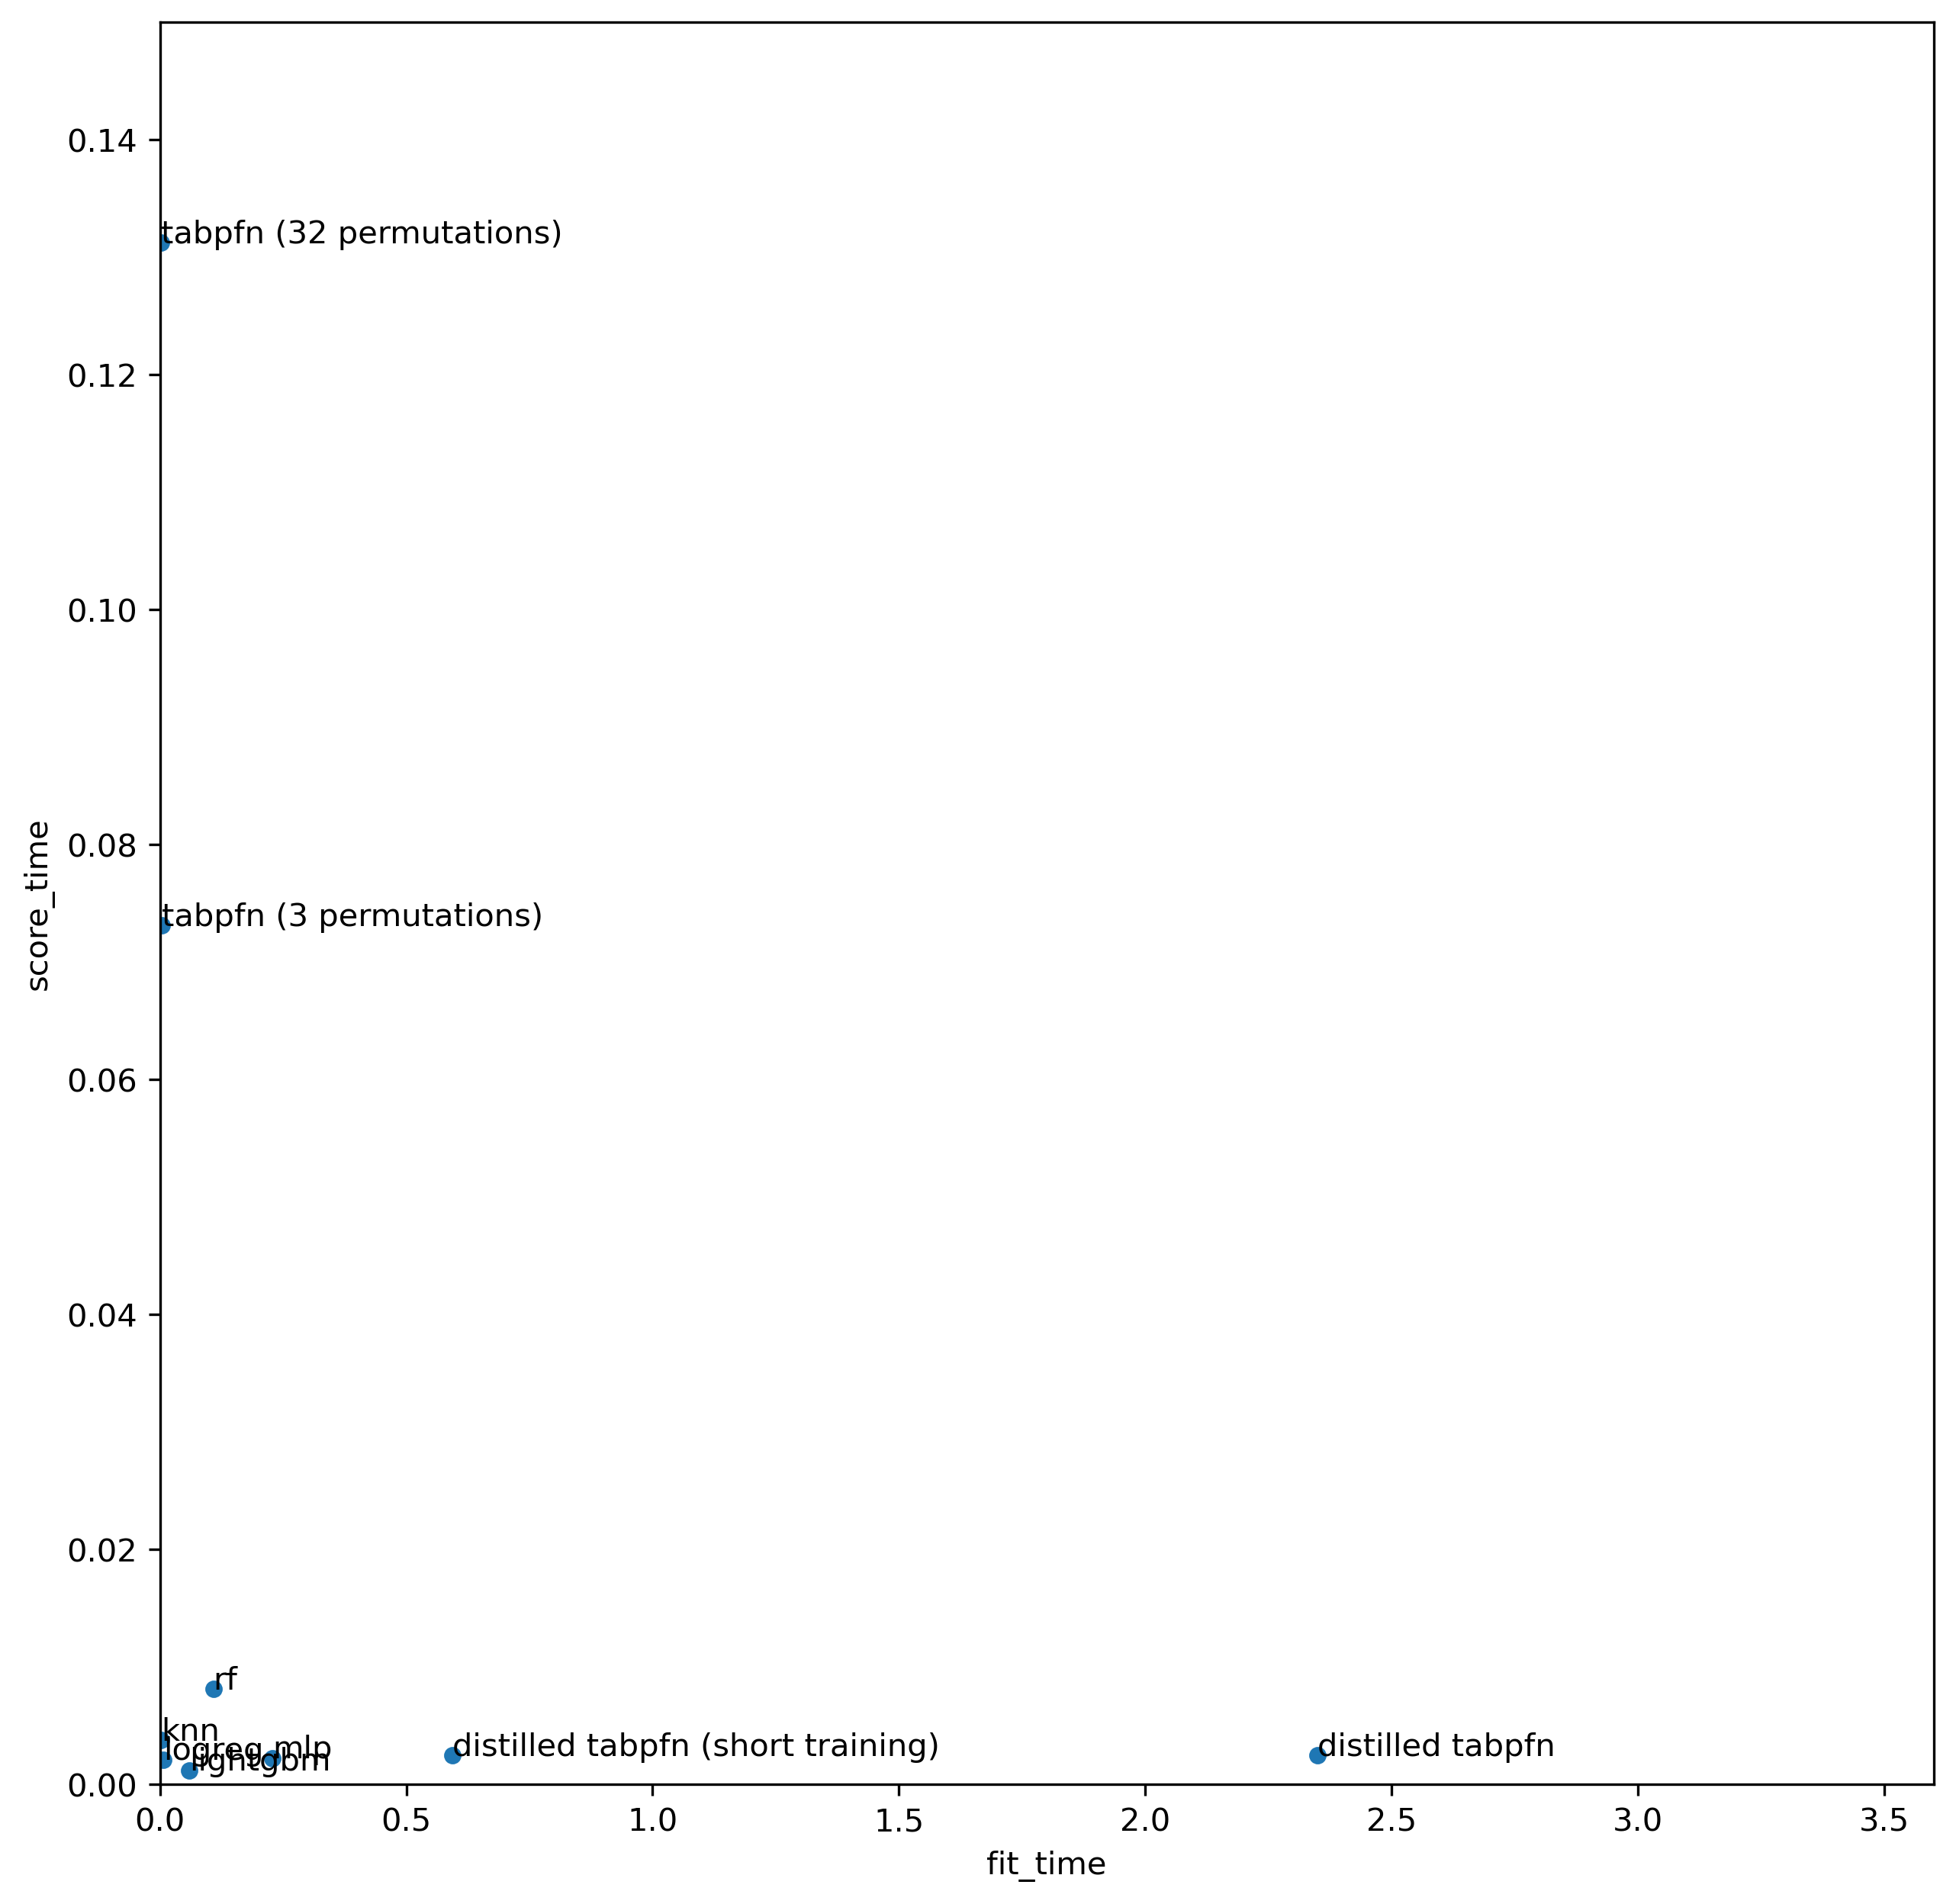

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10), dpi=300)
ax = plt.gca()
aggregate_results.plot(x="fit_time", y="score_time", kind='scatter', ax=ax)
for i, iterrow in aggregate_results.iterrows():
    plt.text(iterrow.fit_time, iterrow.score_time, iterrow.name)
ax.set_ylim(0, 0.15)
ax.set_xlim(0, 3.6)

In [137]:
results.pivot(columns="model", values=['test_score'], index='dataset')

test_score  \
model                            distilled tabpfn   
dataset                                             
Australian                               0.928112   
CPMP-2015-runtime-classification         0.716238   
CastMetal1                               0.798733   
CostaMadre1                              0.808911   
DiabeticMellitus                         0.965591   
...                                           ...   
water-treatment                               NaN   
wholesale-customers                      0.966525   
wine                                     1.000000   
wisconsin                                0.677804   
xd6                                      1.000000   

                                                                              \
model                            distilled tabpfn (short training)       knn   
dataset                                                                        
Australian                                                0.927133  0.896751   
CPMP-2015-runtime-classification                          0.720956  0.669054   
CastMetal1                                                0.773928  0.698879   
CostaMadre1                                               0.797013  0.744555   
DiabeticMellitus                                          0.947167  0.790328   
...                                                            ...       ...   
water-treatment                                                NaN  0.669643   
wholesale-customers                                       0.962733  0.930054   
wine                                                      1.000000  0.995913   
wisconsin                                                 0.671799  0.591587   
xd6                                                       1.000000  0.992627   

                                                                          \
model                             lightgbm    logreg       mlp        rf   
dataset                                                                    
Australian                        0.934822  0.929310  0.921384  0.935912   
CPMP-2015-runtime-classification  0.672368  0.715892  0.710286  0.704475   
CastMetal1                        0.773343  0.760770  0.741569  0.680750   
CostaMadre1                       0.772433  0.768109  0.734766  0.711343   
DiabeticMellitus                  0.994512  0.981428  0.908548  0.995240   
...                                    ...       ...       ...       ...   
water-treatment                   0.997360  0.819075  0.711245  0.943779   
wholesale-customers               0.950568  0.952453  0.960949  0.959223   
wine                              0.999596  1.000000  1.000000  0.998712   
wisconsin                         0.571878  0.636852  0.597354  0.600397   
xd6                               1.000000  0.847319  1.000000  1.000000   

                                                          \
model                            tabpfn (3 permutations)   
dataset                                                    
Australian                                      0.931470   
CPMP-2015-runtime-classification                0.721600   
CastMetal1                                      0.782261   
CostaMadre1                                     0.798426   
DiabeticMellitus                                0.981870   
...                                                  ...   
water-treatment                                      NaN   
wholesale-customers                             0.964756   
wine                                            1.000000   
wisconsin                                       0.680582   
xd6                                             1.000000   

                                                           
model                            tabpfn (32 permutations)  
dataset                                                    
Australian                                       0.932834  
CPMP-2015-runtime-classificat

In [40]:
test_scores = all_results.pivot(columns="model", values=['test_score'], index='dataset').droplevel(level=0, axis=1)
test_scores

model,distilled tabpfn,distilled tabpfn (short training),knn,lightgbm,logreg,mlp,rf,tabpfn (3 permutations),tabpfn (32 permutations),tabpfn_mine_32_no_onehot
dataset,,,,,,,,,,
Australian,0.928112,0.927133,0.896751,0.934822,0.929310,0.921384,0.935912,0.931470,0.932834,0.935252
CPMP-2015-runtime-classification,0.716238,0.720956,0.669054,0.672368,0.715892,0.710286,0.704475,0.721600,0.722757,0.722757
CastMetal1,0.798733,0.773928,0.698879,0.773343,0.760770,0.741569,0.680750,0.782261,0.778801,0.778801
CostaMadre1,0.808911,0.797013,0.744555,0.772433,0.768109,0.734766,0.711343,0.798426,0.794791,0.794791
DiabeticMellitus,0.965591,0.947167,0.790328,0.994512,0.981428,0.908548,0.995240,0.981870,0.986055,0.986341
...,...,...,...,...,...,...,...,...,...,...
water-treatment,NaN,NaN,0.669643,0.997360,0.819075,0.711245,0.943779,NaN,NaN,0.617583
wholesale-customers,0.966525,0.962733,0.930054,0.950568,0.952453,0.960949,0.959223,0.964756,0.965336,0.965468
wine,1.000000,1.000000,0.995913,0.999596,1.000000,1.000000,0.998712,1.000000,1.000000,1.000000


In [172]:
order = test_scores.mean().sort_values().index

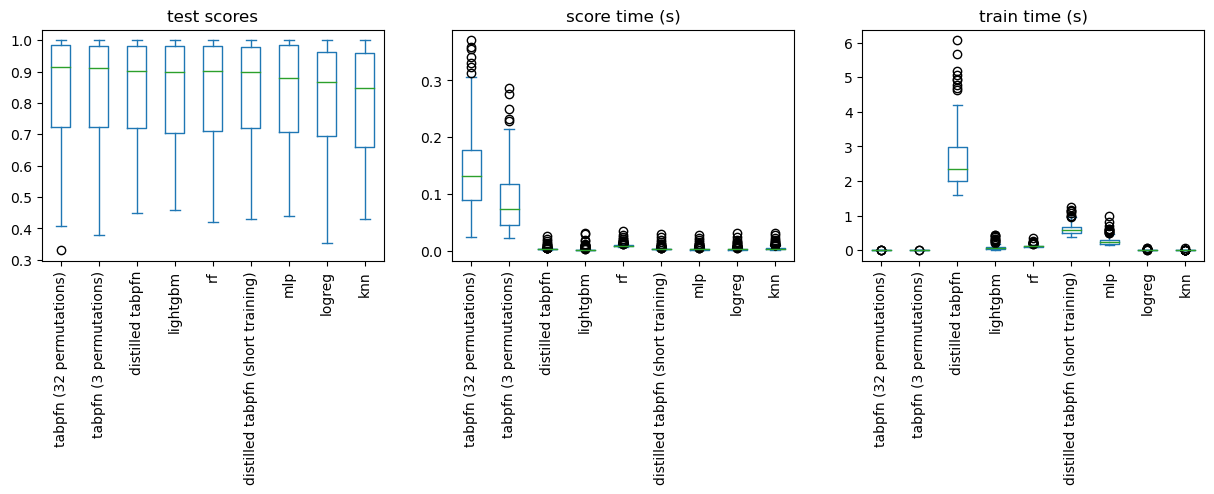

In [201]:
fig, axes =  plt.subplots(1, 3, figsize=(15, 3))
test_scores[order[::-1]].plot(kind='box', rot=90, ax=axes[0])
axes[0].set_title("test scores")

score_time = results.pivot(columns="model", values=['score_time'], index='dataset').droplevel(level=0, axis=1)
score_time[order[::-1]].plot(kind='box', rot=90, ax=axes[1])
axes[1].set_title("score time (s)")

score_time = results.pivot(columns="model", values=['fit_time'], index='dataset').droplevel(level=0, axis=1)
score_time[order[::-1]].plot(kind='box', rot=90, ax=axes[2])
axes[2].set_title("train time (s)")
plt.savefig("performance_and_time_comparison_distillation.png")

In [204]:
results['fit_plus_score'] = results['fit_time'] + results['score_time']

In [196]:
test_scores.stack().reset_index()

,dataset,model,0
0,Australian,distilled tabpfn,0.928112
1,Australian,distilled tabpfn (short training),0.927133
2,Australian,knn,0.896751
3,Australian,lightgbm,0.934822
4,Australian,logreg,0.929310
...,...,...,...
1304,xd6,logreg,0.847319
1305,xd6,mlp,1.000000
1306,xd6,rf,1.000000
1307,xd6,tabpfn (3 permutations),1.000000


['distilled tabpfn' 'distilled tabpfn (short training)' 'knn' 'lightgbm'
 'logreg' 'mlp' 'rf' 'tabpfn (3 permutations)' 'tabpfn (32 permutations)'
 'tabpfn_mine_32_no_onehot']
distilled tabpfn                     12.0
distilled tabpfn (short training)     4.0
knn                                   3.0
lightgbm                             16.0
logreg                               15.0
mlp                                   9.0
rf                                   17.0
tabpfn (3 permutations)              17.0
tabpfn (32 permutations)              8.0
tabpfn_mine_32_no_onehot             12.0
dtype: float64
knn                                  8.606383
mlp                                  6.120567
logreg                               6.109929
lightgbm                             6.007092
rf                                   5.620567
distilled tabpfn (short training)    5.609929
distilled tabpfn                     4.783688
tabpfn_mine_32_no_onehot             4.368794
tabpfn (3 permutation

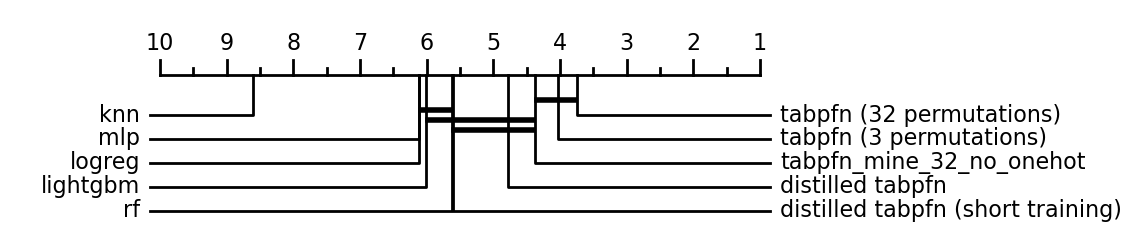

In [42]:
from tabpfn.scripts.critical_differences import draw_cd_diagram
import matplotlib.pyplot as plt
bla  = test_scores.dropna().stack().reset_index()
bla.columns = ['dataset_name', 'classifier_name', 'accuracy']
draw_cd_diagram(bla);
plt.savefig("performance_and_time_comparison_distillation_cd_no_onehot.png")

(0.0, 3.6)

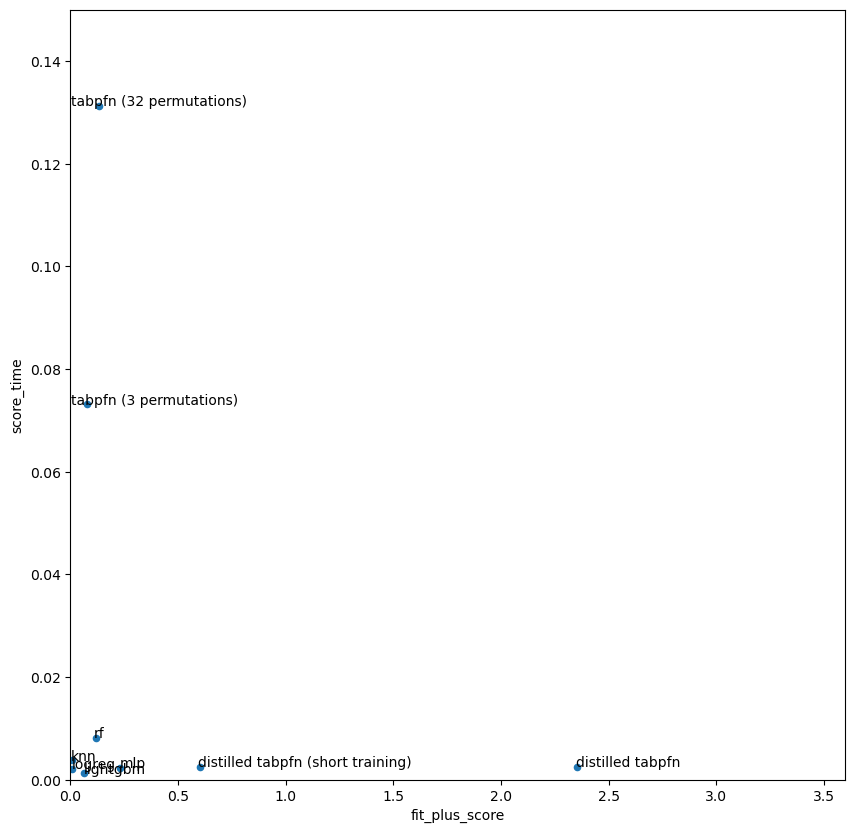

In [209]:
import matplotlib.pyplot as plt
aggregate_results = results.groupby("model").median(numeric_only=True)
plt.figure(figsize=(10, 10), dpi=100)
ax = plt.gca()
aggregate_results.plot(x="fit_plus_score", y="score_time", kind='scatter', ax=ax)
for i, iterrow in aggregate_results.iterrows():
    plt.text(iterrow.fit_time, iterrow.score_time, iterrow.name)
ax.set_ylim(0, 0.15)
ax.set_xlim(0, 3.6)

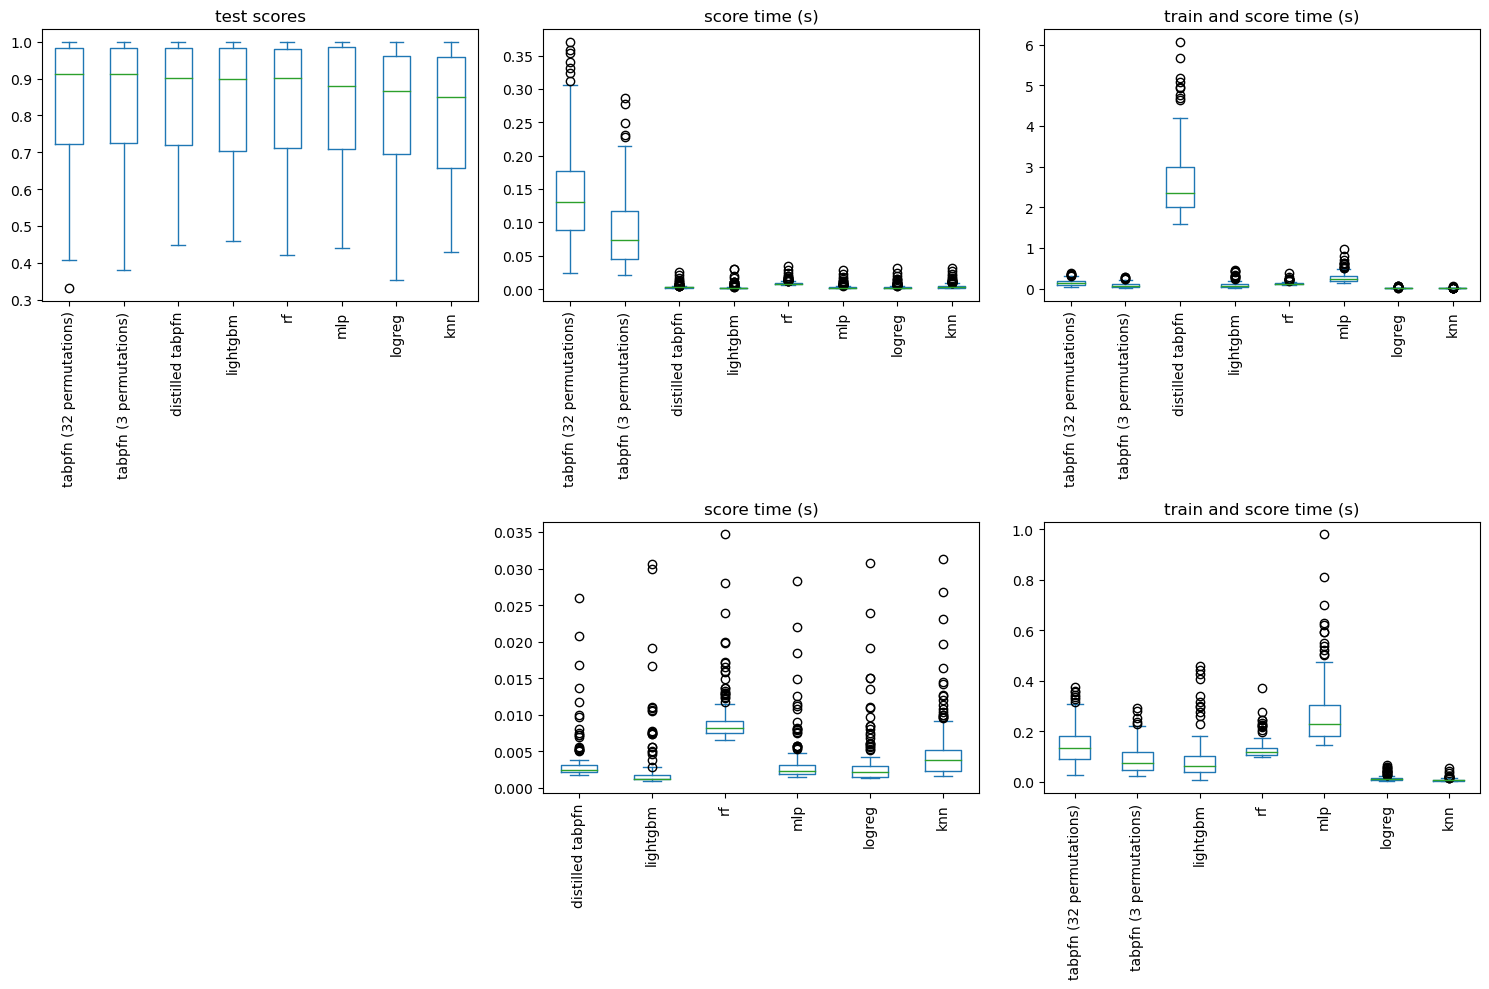

In [227]:
#results = results[results.model != 'distilled tabpfn (short training)']

fig, axes =  plt.subplots(2, 3, figsize=(15, 10))
test_scores = results.pivot(columns="model", values=['test_score'], index='dataset').droplevel(level=0, axis=1)
order = test_scores.mean().sort_values().index
test_scores[order[::-1]].plot(kind='box', rot=90, ax=axes[0, 0])
axes[0, 0].set_title("test scores")

score_time = results.pivot(columns="model", values=['score_time'], index='dataset').droplevel(level=0, axis=1)
score_time[order[::-1]].plot(kind='box', rot=90, ax=axes[0, 1])
axes[0, 1].set_title("score time (s)")

score_time = results.pivot(columns="model", values=['fit_plus_score'], index='dataset').droplevel(level=0, axis=1)
score_time[order[::-1]].plot(kind='box', rot=90, ax=axes[0, 2])
axes[0, 2].set_title("train and score time (s)")

axes[1, 0].set_visible(False)

score_time = results.pivot(columns="model", values=['score_time'], index='dataset').droplevel(level=0, axis=1)
score_time[order[::-1]].drop(columns=['tabpfn (3 permutations)', 'tabpfn (32 permutations)']).plot(kind='box', rot=90, ax=axes[1, 1])
axes[1, 1].set_title("score time (s)")

score_time = results.pivot(columns="model", values=['fit_plus_score'], index='dataset').droplevel(level=0, axis=1)
score_time[order[::-1]].drop(columns=['distilled tabpfn']).plot(kind='box', rot=90, ax=axes[1, 2])
axes[1, 2].set_title("train and score time (s)")

fig.tight_layout()
plt.savefig("performance_and_time_comparison_distillation.png")

In [217]:
results.model.unique()

array(['mlp', 'distilled tabpfn', 'distilled tabpfn (short training)',
       'tabpfn (3 permutations)', 'tabpfn (32 permutations)', 'logreg',
       'knn', 'rf', 'lightgbm'], dtype=object)